In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

plt.rcParams.update(plt.rcParamsDefault)
new_rc_params = {'text.usetex': False, "svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)

sns.set_style({'font.family':'sans-serif', 'font.sans-serif':'Arial'})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42


In [108]:
specific_base_directory = "enrichment_specific_small/"

stage_array = ['13', '14', '15', '17', '18', '19', '19plus', '20', '21', '22', '23', '24', '25', '26', '27']

jaspar_core_mtf = pd.DataFrame(pd.read_csv('jaspar_core_nr.mtf', sep = '\t', header = None))

merged_table = pd.DataFrame()

i = 0
for stage in stage_array:
    basedir = specific_base_directory + 'S' + stage + '_hintatac_specific/'
    txtloc = basedir + 'fulltest_statistics.txt'
    enrichment_table = pd.DataFrame(pd.read_csv(txtloc, sep = '\t'))
    enrichment_table['FREQ'] = enrichment_table['FREQ'].str.split('%', expand = True)[0]
    enrichment_table['FREQ'] = enrichment_table['FREQ'].astype('float')
    enrichment_table['BACK.FREQ.'] = enrichment_table['BACK.FREQ.'].str.split('%', expand = True)[0]
    enrichment_table['BACK.FREQ.'] = enrichment_table['BACK.FREQ.'].astype('float')
    enrichment_table = enrichment_table.merge(jaspar_core_mtf[[0, 3]], left_on = 'FACTOR', right_on = 0, how = 'left')
    if i == 0:
        merged_table = enrichment_table[[3, 'FACTOR', 'BACK.FREQ.', 'FREQ', 'CORR.P-VALUE']]
        merged_table = merged_table.add_prefix('S' + stage + '_')
        merged_table = merged_table.rename({'S13_3': 'TF_name', 'S13_FACTOR': 'JASPAR_ID', 'S13_BACK.FREQ.': 'BACK.FREQ.'}, axis = 1)
    else:
        frame_fragment = enrichment_table[['FREQ', 'CORR.P-VALUE']]
        frame_fragment = frame_fragment.add_prefix('S' + stage + '_')
        frame_fragment['JASPAR_ID'] = enrichment_table['FACTOR']
        merged_table = merged_table.merge(frame_fragment)
    i += 1
display(merged_table)

,TF_name,JASPAR_ID,BACK.FREQ.,S13_FREQ,S13_CORR.P-VALUE,S14_FREQ,S14_CORR.P-VALUE,S15_FREQ,S15_CORR.P-VALUE,S17_FREQ,...,S23_FREQ,S23_CORR.P-VALUE,S24_FREQ,S24_CORR.P-VALUE,S25_FREQ,S25_CORR.P-VALUE,S26_FREQ,S26_CORR.P-VALUE,S27_FREQ,S27_CORR.P-VALUE
0,MSN2,MA0341.1,1.28,2.24,0.0,2.25,0.0,2.26,0.0,2.18,...,2.56,0.0,2.55,0.0,2.49,0.0,2.53,0.0,2.53,0.0
1,MSN4,MA0342.1,1.28,2.24,0.0,2.25,0.0,2.26,0.0,2.18,...,2.56,0.0,2.55,0.0,2.49,0.0,2.53,0.0,2.53,0.0
2,RGM1,MA0366.1,1.28,2.24,0.0,2.25,0.0,2.26,0.0,2.18,...,2.56,0.0,2.55,0.0,2.49,0.0,2.53,0.0,2.53,0.0
3,MET28,MA0332.1,0.56,1.17,0.0,1.17,0.0,1.13,0.0,1.22,...,1.27,0.0,1.27,0.0,1.27,0.0,1.25,0.0,1.27,0.0
4,OBP3,MA1274.1,0.00,0.61,0.0,0.75,0.0,0.75,0.0,0.64,...,0.48,0.0,0.44,0.0,0.46,0.0,0.46,0.0,0.52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,Dll,MA0187.1,0.24,0.14,1.0,0.16,1.0,0.15,1.0,0.16,...,0.12,1.0,0.12,1.0,0.12,1.0,0.12,1.0,0.13,1.0
1642,RGT1,MA0367.1,0.18,0.14,1.0,0.15,1.0,0.15,1.0,0.14,...,0.12,1.0,0.13,1.0,0.13,1.0,0.12,1.0,0.12,1.0
1643,dsc-1,MA0919.1,0.20,0.12,1.0,0.12,1.0,0.12,1.0,0.12,...,0.10,1.0,0.10,1.0,0.09,1.0,0.09,1.0,0.10,1.0
1644,PAX4,MA0068.2,0.14,0.11,1.0,0.12,1.0,0.12,1.0,0.12,...,0.10,1.0,0.10,1.0,0.09,1.0,0.09,1.0,0.10,1.0


<ipython-input-127-4d4ecf8c4678>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)


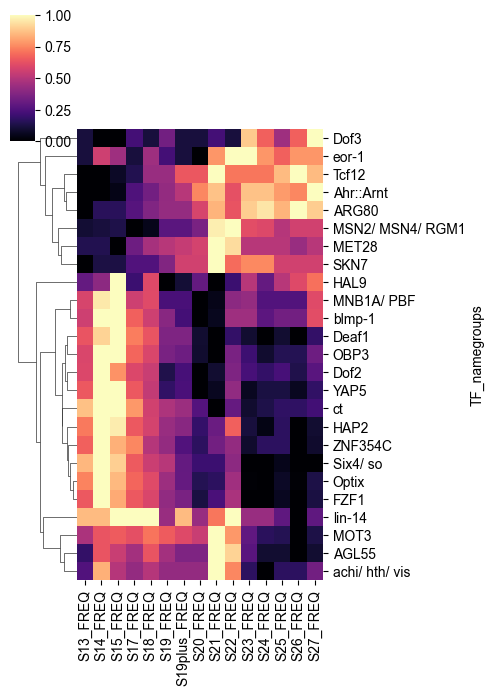

In [127]:
top_n = 25

sig_table = merged_table.loc[(merged_table.filter(like='CORR.P-VALUE') < 0.05).any(axis = 1)]
sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)

groupby = sig_table.groupby([col for col in dro_enrichment_table.columns if '_FREQ' in col])
groupby_df = groupby['TF_name'].apply(list).reset_index()
groupby_df['TF_namegroups'] = groupby_df['TF_name'].apply(lambda x: '/ '.join(x))
groupby_df.index = groupby_df['TF_namegroups']
groupby_df = groupby_df.sort_values('mean_FREQ', ascending = False)
groupby_df = groupby_df.drop('mean_FREQ', axis = 1)

all_matrix = groupby_df.iloc[0:top_n].filter(like = '_FREQ')

clusters_top_enrich = sns.clustermap(all_matrix, col_cluster = False, figsize = (5, 7), standard_scale = 'rows', cmap = 'magma')
clusters_top_enrich.savefig('HINT-ATAC_top' + str(top_n) + '_enrichment_clustered_grouped.svg')

plt.show()

,S13_FREQ,S14_FREQ,S15_FREQ,S17_FREQ,S18_FREQ,S19_FREQ,S19plus_FREQ,S20_FREQ,S21_FREQ,S22_FREQ,S23_FREQ,S24_FREQ,S25_FREQ,S26_FREQ,S27_FREQ
TF_name,,,,,,,,,,,,,,,
AT4G28140,14.000000,14.000000,15.000000,17.000000,20.000000,21.000000,19.000000,22.000000,26.000000,23.000000,27.000000,25.000000,25.000000,25.000000,25.000000
DREB26,15.000000,15.000000,16.000000,17.000000,20.000000,20.000000,20.000000,22.000000,25.000000,23.000000,25.000000,25.000000,24.000000,24.000000,24.000000
STP2,10.000000,10.000000,10.000000,11.000000,12.000000,12.000000,12.000000,14.000000,15.000000,14.000000,15.000000,15.000000,16.000000,15.000000,16.000000
BZR1,12.000000,12.000000,13.000000,12.000000,14.000000,12.000000,13.000000,14.000000,15.000000,13.000000,13.000000,12.000000,12.000000,13.000000,13.000000
TCP14,10.000000,11.000000,10.000000,10.000000,11.000000,10.000000,11.000000,11.000000,14.000000,14.000000,11.000000,11.000000,11.000000,11.000000,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IDD2,0.924528,1.075472,1.075472,0.943396,0.924528,0.830189,0.754717,0.716981,0.679245,0.773585,0.754717,0.716981,0.735849,0.754717,0.773585
SOC1,0.921053,1.078947,1.131579,0.973684,0.921053,0.815789,0.789474,0.736842,0.657895,0.815789,0.710526,0.684211,0.736842,0.710526,0.736842
DMRT3,0.923077,1.115385,1.000000,0.923077,0.884615,0.807692,0.807692,0.692308,0.769231,0.884615,0.692308,0.692308,0.730769,0.692308,0.769231


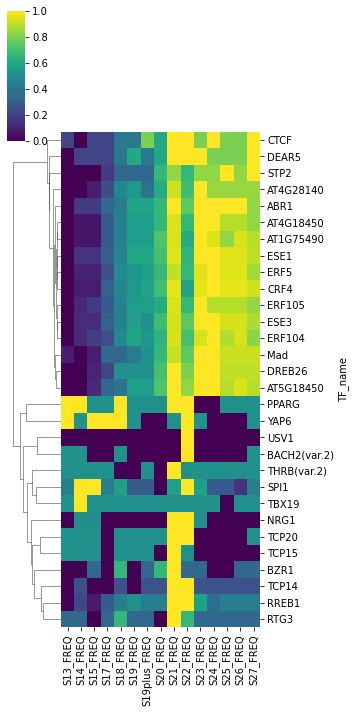

In [297]:
sig_table_forfoldchange = sig_table.copy(deep = True)
sig_table_forfoldchange.index = sig_table['TF_name']

fold_change_table = pd.DataFrame()

for column in sig_table_forfoldchange.filter(like = '_FREQ'):
    fold_change_table[column] = sig_table_forfoldchange[column] / sig_table_forfoldchange['BACK.FREQ.']

fold_change_table = fold_change_table.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
fold_change_table.sort_values('mean_FREQ', ascending = False, inplace = True)
fold_change_table = fold_change_table.drop('mean_FREQ', axis = 1)

display(fold_change_table)

sns.clustermap(fold_change_table.iloc[0:30], col_cluster = False, standard_scale = 'rows', figsize = (5, 10), cmap = 'viridis')

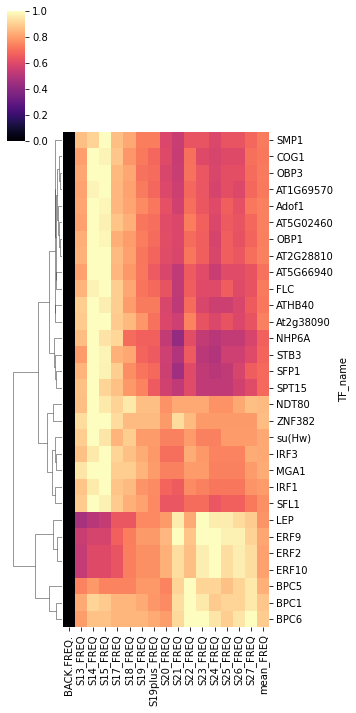

In [298]:
zeros_table = sig_table_forfoldchange[sig_table_forfoldchange['BACK.FREQ.'] == 0]
zeros_matrix = zeros_table.iloc[0:30].filter(like = 'FREQ')

sns.clustermap(zeros_matrix , col_cluster = False, figsize = (5, 10), standard_scale = 'rows', cmap = 'magma')

,S13_FREQ,S14_FREQ,S15_FREQ,S17_FREQ,S18_FREQ,S19_FREQ,S19plus_FREQ,S20_FREQ,S21_FREQ,S22_FREQ,S23_FREQ,S24_FREQ,S25_FREQ,S26_FREQ,S27_FREQ
TF_name,,,,,,,,,,,,,,,
AT4G28140,14.000000,14.000000,15.000000,17.000000,20.000000,21.000000,19.000000,22.000000,26.000000,23.000000,27.000000,25.000000,25.000000,25.000000,25.000000
DREB26,15.000000,15.000000,16.000000,17.000000,20.000000,20.000000,20.000000,22.000000,25.000000,23.000000,25.000000,25.000000,24.000000,24.000000,24.000000
STP2,10.000000,10.000000,10.000000,11.000000,12.000000,12.000000,12.000000,14.000000,15.000000,14.000000,15.000000,15.000000,16.000000,15.000000,16.000000
BZR1,12.000000,12.000000,13.000000,12.000000,14.000000,12.000000,13.000000,14.000000,15.000000,13.000000,13.000000,12.000000,12.000000,13.000000,13.000000
TCP14,10.000000,11.000000,10.000000,10.000000,11.000000,10.000000,11.000000,11.000000,14.000000,14.000000,11.000000,11.000000,11.000000,11.000000,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IDD2,0.924528,1.075472,1.075472,0.943396,0.924528,0.830189,0.754717,0.716981,0.679245,0.773585,0.754717,0.716981,0.735849,0.754717,0.773585
SOC1,0.921053,1.078947,1.131579,0.973684,0.921053,0.815789,0.789474,0.736842,0.657895,0.815789,0.710526,0.684211,0.736842,0.710526,0.736842
DMRT3,0.923077,1.115385,1.000000,0.923077,0.884615,0.807692,0.807692,0.692308,0.769231,0.884615,0.692308,0.692308,0.730769,0.692308,0.769231


,S13_FREQ,S14_FREQ,S15_FREQ,S17_FREQ,S18_FREQ,S19_FREQ,S19plus_FREQ,S20_FREQ,S21_FREQ,S22_FREQ,S23_FREQ,S24_FREQ,S25_FREQ,S26_FREQ,S27_FREQ
TF_name,,,,,,,,,,,,,,,
AT4G28140,14.000000,14.000000,15.000000,17.000000,20.000000,21.000000,19.000000,22.000000,26.000000,23.000000,27.000000,25.000000,25.000000,25.000000,25.000000
DREB26,15.000000,15.000000,16.000000,17.000000,20.000000,20.000000,20.000000,22.000000,25.000000,23.000000,25.000000,25.000000,24.000000,24.000000,24.000000
STP2,10.000000,10.000000,10.000000,11.000000,12.000000,12.000000,12.000000,14.000000,15.000000,14.000000,15.000000,15.000000,16.000000,15.000000,16.000000
BZR1,12.000000,12.000000,13.000000,12.000000,14.000000,12.000000,13.000000,14.000000,15.000000,13.000000,13.000000,12.000000,12.000000,13.000000,13.000000
TCP14,10.000000,11.000000,10.000000,10.000000,11.000000,10.000000,11.000000,11.000000,14.000000,14.000000,11.000000,11.000000,11.000000,11.000000,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IDD2,0.924528,1.075472,1.075472,0.943396,0.924528,0.830189,0.754717,0.716981,0.679245,0.773585,0.754717,0.716981,0.735849,0.754717,0.773585
SOC1,0.921053,1.078947,1.131579,0.973684,0.921053,0.815789,0.789474,0.736842,0.657895,0.815789,0.710526,0.684211,0.736842,0.710526,0.736842
DMRT3,0.923077,1.115385,1.000000,0.923077,0.884615,0.807692,0.807692,0.692308,0.769231,0.884615,0.692308,0.692308,0.730769,0.692308,0.769231


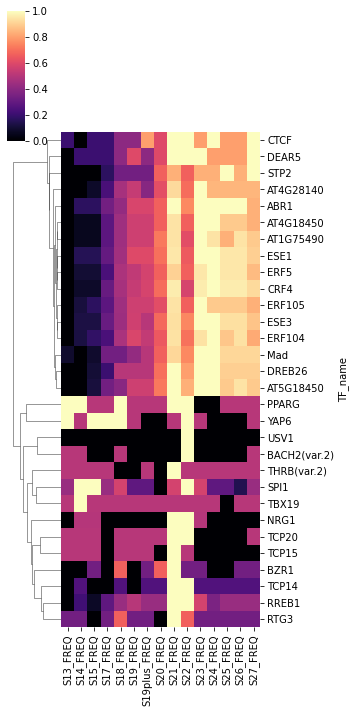

In [299]:
var_table = fold_change_table.copy(deep=True)
display(fold_change_table)

var_table['var'] = var_table.var(axis = 1)

var_table.sort_values('var', ascending = False, axis = 0)
var_table = var_table.drop('var', axis = 1)
display(var_table)

sns.clustermap(var_table.head(30), col_cluster = False, figsize = (5, 10), cmap = 'magma', standard_scale = 'rows')

In [300]:
columns = ['Orthogroup', 'mikado_gene_string', 'UNIPROT_IDs']
assigned = pd.DataFrame(pd.read_csv('JASPAR_OrthoFinder/' + 'Orthogroups.tsv', sep='\t', names = columns, skiprows = 1))
assigned.dropna(inplace = True)
assigned['Gene_IDs'] = assigned['UNIPROT_IDs'].apply(lambda x: x[:].split(','))
assigned['mikado_genes'] = assigned['mikado_gene_string'].apply(lambda x: x[:].split(','))

exploded_1 = assigned.explode('Gene_IDs')
exploded_2 = exploded_1.explode('mikado_genes')
exploded_2['UNIPROT_ID'] = exploded_2['Gene_IDs'].str.split('|', expand = True)[1]
dummy_df = exploded_2['mikado_genes'].str.split('.', expand = True)
exploded_2['mikado_gene'] = dummy_df[0] + '.' + dummy_df[1] + '.' + dummy_df[2]

mikado_vs_UNIPROT = exploded_2[['mikado_gene', 'UNIPROT_ID']]

JASPAR_vs_UNIPROT = pd.DataFrame(pd.read_csv('jaspar_core_nr_UNIPROT_IDs.csv', names = ['JASPAR_ID', 'UNIPROT_ID'], sep = '\t', skiprows = 1))

all_keys = JASPAR_vs_UNIPROT.merge(mikado_vs_UNIPROT, how = 'left')
all_keys.dropna(inplace = True)
display(all_keys)

,JASPAR_ID,UNIPROT_ID,mikado_gene
1,MA0002.2,Q01196,mikado.phaw_50.283868bG35
2,MA0002.2,Q01196,mikado.phaw_50.283873aG88
3,MA0003.4,P05549,mikado.phaw_50.015400bG63
6,MA0006.1,P30561,mikado.phaw_50.000135aG35
17,MA0017.2,P10589,mikado.phaw_50.283823cG746
...,...,...,...
1652,MA1648.1,Q99081,mikado.phaw_50.015400bG324
1685,MA1682.1,Q8L548,mikado.phaw_50.283869cG471
1687,MA1684.1,Q61575,mikado.phaw_50.004430G352
1704,MA1701.1,Q10655,mikado.phaw_50.000135dG13


In [319]:
genes_TMMexprloc = '~/Labwork/Bioinformatics/Parhyale_RNA-Seq/SLURM_scripts/' + 'kallisto.gene.TMM.EXPR.matrix'
expression = pd.DataFrame(pd.read_csv(genes_TMMexprloc, sep = '\t'))
expression = expression.add_suffix('_EXPR')
expression = expression.rename({'Unnamed: 0_EXPR': 'mikado_gene'}, axis = 1)

TF_expression = all_keys.merge(expression, left_on = 'mikado_gene', right_on = 'mikado_gene', how = 'left')
TF_expression.dropna(inplace = True)

TF_enrich_expression = TF_expression.merge(sig_table, left_on = 'JASPAR_ID', right_on = 'JASPAR_ID', how = 'left')
TF_enrich_expression.dropna(inplace = True)
TF_enrich_expression.sort_values('mean_FREQ', ascending = False, inplace = True)
TF_enrich_expression.index = TF_enrich_expression['TF_name']

display(TF_enrich_expression)

,JASPAR_ID,UNIPROT_ID,mikado_gene,S13A1_EXPR,S13B1_EXPR,S13C1_EXPR,S19A1_EXPR,S19B1_EXPR,S19C1_EXPR,S21A_EXPR,...,S23_CORR.P-VALUE,S24_FREQ,S24_CORR.P-VALUE,S25_FREQ,S25_CORR.P-VALUE,S26_FREQ,S26_CORR.P-VALUE,S27_FREQ,S27_CORR.P-VALUE,mean_FREQ
TF_name,,,,,,,,,,,,,,,,,,,,,
RGM1,MA0366.1,Q00453,mikado.phaw_50.007301aG444,5.721,0.930,0.000,5.378,0.000,0.000,17.743,...,0.000000e+00,2.55,0.000000e+00,2.49,0.000000e+00,2.53,0.000000e+00,2.53,0.000000e+00,2.432000
achi,MA0207.1,A1Z916,mikado.phaw_50.282260bG84,0.457,0.301,0.322,0.249,0.779,0.022,1.375,...,6.097600e-36,0.81,1.356300e-26,0.83,4.360500e-36,0.83,9.264600e-34,0.85,4.493900e-45,0.860667
hth,MA0227.1,O46339,mikado.phaw_50.283815bG317,8.158,7.252,9.276,21.130,20.828,15.976,35.421,...,6.097600e-36,0.81,1.356300e-26,0.83,4.360500e-36,0.83,9.264600e-34,0.85,4.493900e-45,0.860667
vis,MA0252.1,A1Z913,mikado.phaw_50.282260bG84,0.457,0.301,0.322,0.249,0.779,0.022,1.375,...,6.097600e-36,0.81,1.356300e-26,0.83,4.360500e-36,0.83,9.264600e-34,0.85,4.493900e-45,0.860667
Deaf1,MA0185.1,Q24180,mikado.phaw_50.283823cG590,0.000,0.114,0.113,0.677,0.089,0.000,1.142,...,2.013300e-03,0.82,1.247000e-02,0.83,2.130500e-03,0.82,3.297600e-03,0.84,3.559700e-05,0.858667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USV1,MA0413.1,Q12132,mikado.phaw_50.007301aG444,5.721,0.930,0.000,5.378,0.000,0.000,17.743,...,4.144300e-146,0.07,6.832800e-138,0.07,8.488800e-127,0.07,7.865900e-137,0.07,3.134000e-148,0.070667
MITF,MA0620.3,O75030,mikado.phaw_50.283815cG381,1.688,5.040,3.091,1.909,0.714,0.937,0.470,...,1.553500e-69,0.06,1.713100e-65,0.06,1.868800e-58,0.06,5.169800e-66,0.07,4.293900e-77,0.068667
NRG1,MA0347.1,Q03125,mikado.phaw_50.007301aG454,0.000,0.259,0.000,0.612,0.000,0.000,2.467,...,1.949300e-186,0.06,3.196000e-169,0.06,3.923000e-145,0.06,3.279100e-134,0.06,2.495800e-145,0.064667


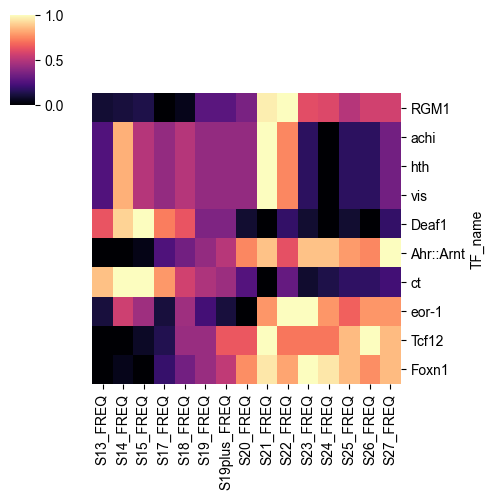

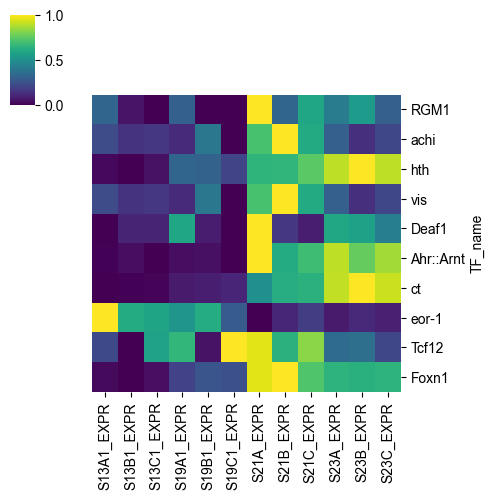

In [385]:
top_n = 10

freq_matrix = TF_enrich_expression.iloc[0:top_n].filter(like = '_FREQ')
freq_matrix.drop('mean_FREQ', axis = 1, inplace = True)

sns.clustermap(freq_matrix, row_cluster = False, col_cluster = False, figsize = (5, 5), standard_scale = 'rows', cmap = 'magma')

expr_matrix = TF_enrich_expression.iloc[0:top_n].filter(like = 'EXPR')

sns.clustermap(expr_matrix, row_cluster = False, col_cluster = False, figsize = (5, 5), standard_scale = 'rows', cmap = 'viridis')

In [387]:
TF_enrich_expression_means = TF_enrich_expression.copy(deep = True)

stages = ['S13', 'S19', 'S21', 'S23']

for stage in stages:
    stage_cols = [col for col in TF_enrich_expression_means.filter(like = 'EXPR').columns if stage in col]
    TF_enrich_expression_means[stage + '_mean_expr'] = TF_enrich_expression_means[stage_cols].mean(axis = 1)

TF_enrich_expression_stages = pd.DataFrame()

for stage in stages:
    stage_cols = [col for col in TF_enrich_expression_means.columns if stage in col]
    for col in stage_cols:
        if 'S19plus' in col:
            continue
        else:
            TF_enrich_expression_stages[col] = TF_enrich_expression_means[col]

TF_enrich_expression_stages['mean_FREQ'] = TF_enrich_expression_means['mean_FREQ']
TF_enrich_expression_stages.sort_values('mean_FREQ', ascending = False, inplace = True)
display(TF_enrich_expression_stages)

,S13A1_EXPR,S13B1_EXPR,S13C1_EXPR,S13_FREQ,S13_CORR.P-VALUE,S13_mean_expr,S19A1_EXPR,S19B1_EXPR,S19C1_EXPR,S19_FREQ,...,S21_FREQ,S21_CORR.P-VALUE,S21_mean_expr,S23A_EXPR,S23B_EXPR,S23C_EXPR,S23_FREQ,S23_CORR.P-VALUE,S23_mean_expr,mean_FREQ
TF_name,,,,,,,,,,,,,,,,,,,,,
RGM1,5.721,0.930,0.000,2.24,0.000000e+00,2.217000,5.378,0.000,0.000,2.35,...,2.78,0.000000e+00,11.324667,7.329,9.635,5.293,2.56,0.000000e+00,7.419000,2.432000
vis,0.457,0.301,0.322,0.84,1.845400e-26,0.360000,0.249,0.779,0.022,0.86,...,0.93,5.580000e-91,1.496000,0.591,0.288,0.426,0.83,6.097600e-36,0.435000,0.860667
achi,0.457,0.301,0.322,0.84,1.845400e-26,0.360000,0.249,0.779,0.022,0.86,...,0.93,5.580000e-91,1.496000,0.591,0.288,0.426,0.83,6.097600e-36,0.435000,0.860667
hth,8.158,7.252,9.276,0.84,1.845400e-26,8.228667,21.130,20.828,15.976,0.86,...,0.93,5.580000e-91,36.745000,46.223,50.446,46.109,0.83,6.097600e-36,47.592667,0.860667
Deaf1,0.000,0.114,0.113,0.89,3.484900e-12,0.075667,0.677,0.089,0.000,0.86,...,0.82,4.987600e-03,0.473000,0.681,0.655,0.485,0.83,2.013300e-03,0.607000,0.858667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USV1,5.721,0.930,0.000,0.07,9.147900e-108,2.217000,5.378,0.000,0.000,0.07,...,0.07,1.046500e-155,11.324667,7.329,9.635,5.293,0.07,4.144300e-146,7.419000,0.070667
MITF,1.688,5.040,3.091,0.07,7.846400e-61,3.273000,1.909,0.714,0.937,0.07,...,0.08,5.015700e-93,1.060667,1.174,0.801,1.106,0.06,1.553500e-69,1.027000,0.068667
NRG1,0.000,0.259,0.000,0.06,2.964100e-114,0.086333,0.612,0.000,0.000,0.06,...,0.08,3.494900e-221,1.555333,1.964,7.654,1.625,0.07,1.949300e-186,3.747667,0.064667


{19: 0,
 4: 1,
 6: 2,
 11: 3,
 13: 4,
 10: 5,
 18: 6,
 16: 7,
 3: 8,
 1: 9,
 2: 10,
 7: 11,
 17: 12,
 5: 13,
 9: 14,
 0: 15,
 15: 16,
 14: 17,
 8: 18,
 12: 19}

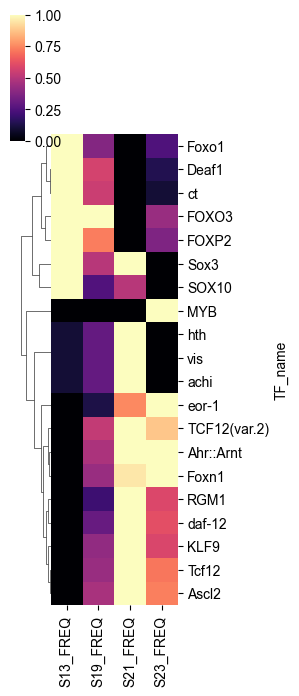

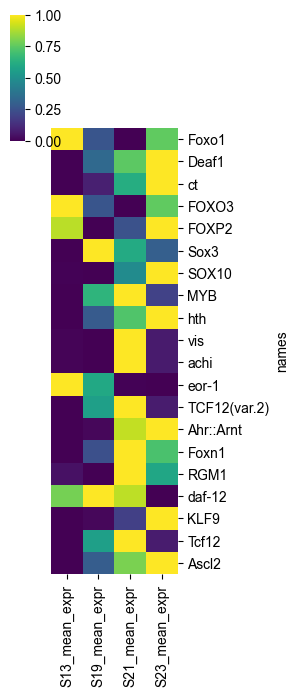

In [392]:
top_n = 20

freq_matrix = TF_enrich_expression_stages.iloc[0:top_n].filter(like = '_FREQ')
freq_matrix.drop('mean_FREQ', axis = 1, inplace = True)

clusters = sns.clustermap(freq_matrix, row_cluster = True, col_cluster = False, figsize = (3, 7), standard_scale = 'rows', cmap = 'magma')
orders = clusters.dendrogram_row.reordered_ind
clusters.savefig('HINT_vs_RNA_top' + str(top_n) +'_enrichment.svg')

expr_matrix = TF_enrich_expression_stages.iloc[0:top_n].filter(like = '_mean_expr')

reorder_dict = dict(zip(orders, np.arange(0, len(expr_matrix))))
display(reorder_dict)

expr_matrix['names'] = expr_matrix.index
expr_matrix['original_order'] = np.arange(0, len(expr_matrix))
expr_matrix.index = np.arange(0, len(expr_matrix))
reordered_matrix = expr_matrix.iloc[expr_matrix['original_order'].map(reorder_dict).sort_values().index]
reordered_matrix.index = reordered_matrix['names']
reordered_clean_matrix = reordered_matrix.filter(like = '_mean_expr')

clusters2 = sns.clustermap(reordered_clean_matrix, row_cluster = False, col_cluster = False, figsize = (3, 7), standard_scale = 'rows', cmap = 'viridis')
clusters2.savefig('HINT_vs_RNA_top' + str(top_n) +'_expression.svg')

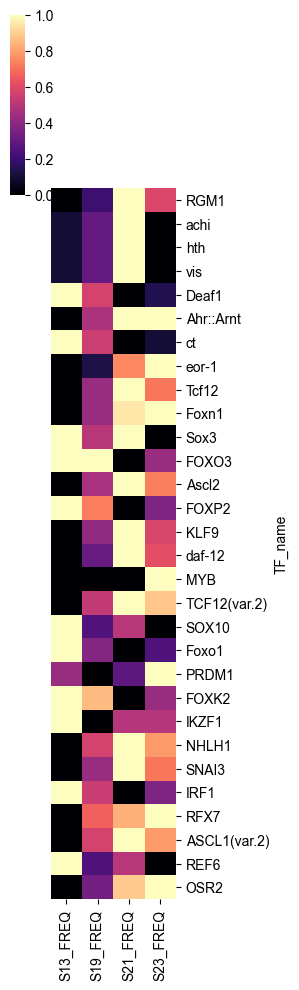

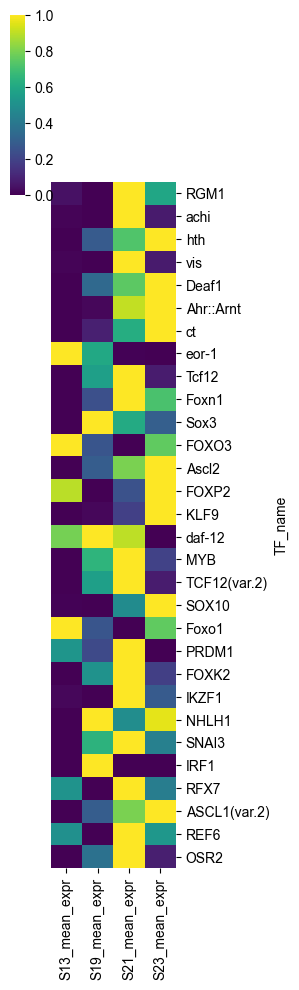

In [384]:
top_n = 30

freq_matrix = TF_enrich_expression_stages.iloc[0:top_n].filter(like = '_FREQ')

clusters = sns.clustermap(freq_matrix, row_cluster = False, col_cluster = False, figsize = (3, 10), standard_scale = 'rows', cmap = 'magma')
#lusters.savefig('HINT_vs_RNA_top' + str(top_n) +'_enrichment.svg')

expr_matrix = TF_enrich_expression_stages.iloc[0:top_n].filter(like = '_mean_expr')

clusters2 = sns.clustermap(expr_matrix, row_cluster = False, col_cluster = False, figsize = (3, 10), standard_scale = 'rows', cmap = 'viridis')
#lusters2.savefig('HINT_vs_RNA_top' + str(top_n) +'_expression.svg')

In [408]:
TF_enrich_expression_means = TF_enrich_expression.copy(deep = True)
TF_enrich_expression_means.drop_duplicates('mikado_gene', keep = 'first', inplace = True)

stages = ['S13', 'S19', 'S21', 'S23']

for stage in stages:
    stage_cols = [col for col in TF_enrich_expression_means.filter(like = 'EXPR').columns if stage in col]
    TF_enrich_expression_means[stage + '_mean_expr'] = TF_enrich_expression_means[stage_cols].mean(axis = 1)

TF_enrich_expression_stages = pd.DataFrame()

for stage in stages:
    stage_cols = [col for col in TF_enrich_expression_means.columns if stage in col]
    for col in stage_cols:
        if 'S19plus' in col:
            continue
        else:
            TF_enrich_expression_stages[col] = TF_enrich_expression_means[col]

mean_cols = [col for col in TF_enrich_expression_means.filter(like = '_mean_expr').columns]
TF_enrich_expression_stages['global_mean_expr'] = TF_enrich_expression_means[mean_cols].mean(axis = 1)
            
TF_enrich_expression_stages.sort_values('global_mean_expr', ascending = False, inplace = True)

{2: 0,
 6: 1,
 26: 2,
 9: 3,
 4: 4,
 16: 5,
 18: 6,
 19: 7,
 21: 8,
 10: 9,
 17: 10,
 7: 11,
 28: 12,
 11: 13,
 24: 14,
 0: 15,
 1: 16,
 27: 17,
 14: 18,
 15: 19,
 3: 20,
 22: 21,
 25: 22,
 29: 23,
 5: 24,
 8: 25,
 12: 26,
 13: 27,
 20: 28,
 23: 29}

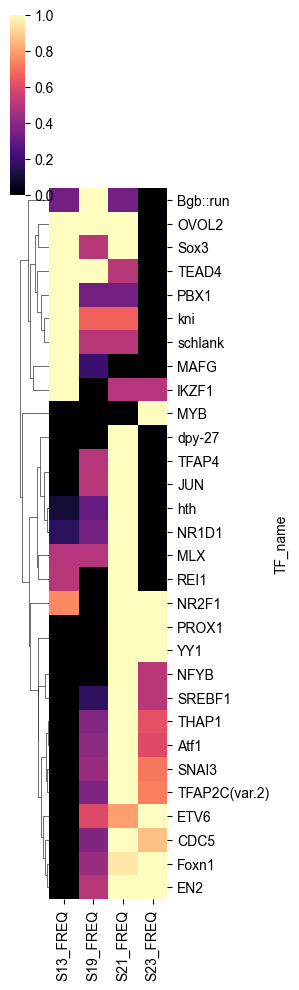

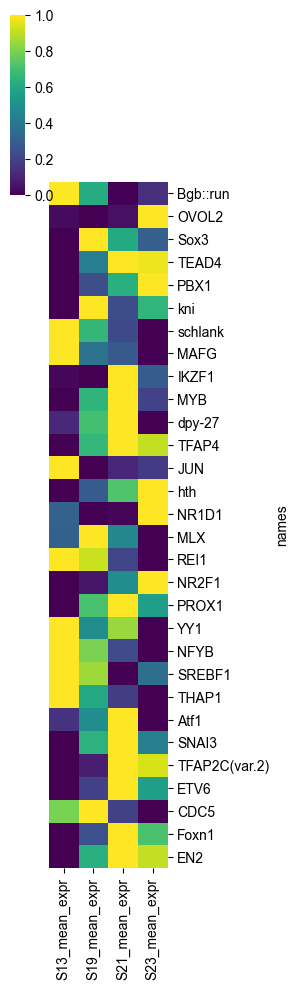

In [409]:
top_n = 30

freq_matrix = TF_enrich_expression_stages.iloc[0:top_n].filter(like = '_FREQ')

clusters = sns.clustermap(freq_matrix, row_cluster = True, col_cluster = False, figsize = (3, 10), standard_scale = 'rows', cmap = 'magma')
orders = clusters.dendrogram_row.reordered_ind
clusters.savefig('HINT_vs_RNA_top' + str(top_n) +'_enrichment_bymeanexpr.svg')

expr_matrix = TF_enrich_expression_stages.iloc[0:top_n].filter(like = '_mean_expr')
expr_matrix.drop('global_mean_expr', axis = 1, inplace = True)

reorder_dict = dict(zip(orders, np.arange(0, len(expr_matrix))))
display(reorder_dict)

expr_matrix['names'] = expr_matrix.index
expr_matrix['original_order'] = np.arange(0, len(expr_matrix))
expr_matrix.index = np.arange(0, len(expr_matrix))
reordered_matrix = expr_matrix.iloc[expr_matrix['original_order'].map(reorder_dict).sort_values().index]
reordered_matrix.index = reordered_matrix['names']
reordered_clean_matrix = reordered_matrix.filter(like = '_mean_expr')

clusters2 = sns.clustermap(reordered_clean_matrix, row_cluster = False, col_cluster = False, figsize = (3, 10), standard_scale = 'rows', cmap = 'viridis')
clusters2.savefig('HINT_vs_RNA_top' + str(top_n) +'_expression_bymeanexpr.svg')

{15: 0,
 28: 1,
 22: 2,
 19: 3,
 13: 4,
 2: 5,
 18: 6,
 25: 7,
 1: 8,
 3: 9,
 6: 10,
 24: 11,
 16: 12,
 0: 13,
 26: 14,
 27: 15,
 4: 16,
 11: 17,
 9: 18,
 7: 19,
 23: 20,
 8: 21,
 12: 22,
 20: 23,
 21: 24,
 5: 25,
 14: 26,
 10: 27,
 17: 28,
 29: 29}

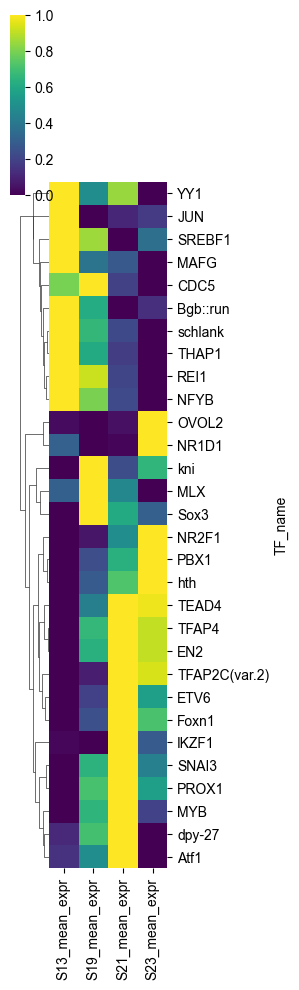

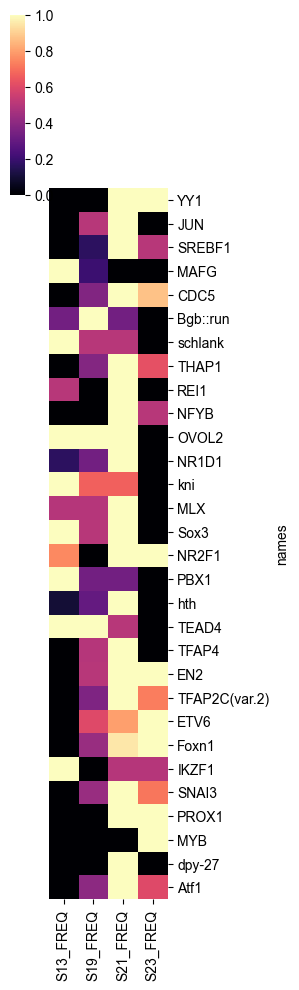

In [410]:
top_n = 30

freq_matrix = TF_enrich_expression_stages.iloc[0:top_n].filter(like = '_mean_expr')
freq_matrix.drop('global_mean_expr', axis = 1, inplace = True)

clusters = sns.clustermap(freq_matrix, row_cluster = True, col_cluster = False, figsize = (3, 10), standard_scale = 'rows', cmap = 'viridis')
orders = clusters.dendrogram_row.reordered_ind
#clusters.savefig('HINT_vs_RNA_top' + str(top_n) +'_enrichment_bymeanexpr.svg')

expr_matrix = TF_enrich_expression_stages.iloc[0:top_n].filter(like = '_FREQ')

reorder_dict = dict(zip(orders, np.arange(0, len(expr_matrix))))
display(reorder_dict)

expr_matrix['names'] = expr_matrix.index
expr_matrix['original_order'] = np.arange(0, len(expr_matrix))
expr_matrix.index = np.arange(0, len(expr_matrix))
reordered_matrix = expr_matrix.iloc[expr_matrix['original_order'].map(reorder_dict).sort_values().index]
reordered_matrix.index = reordered_matrix['names']
reordered_clean_matrix = reordered_matrix.filter(like = '_FREQ')

clusters2 = sns.clustermap(reordered_clean_matrix, row_cluster = False, col_cluster = False, figsize = (3, 10), standard_scale = 'rows', cmap = 'magma')
#clusters2.savefig('HINT_vs_RNA_top' + str(top_n) +'_expression_bymeanexpr.svg')

<ipython-input-478-51804fe804ed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)


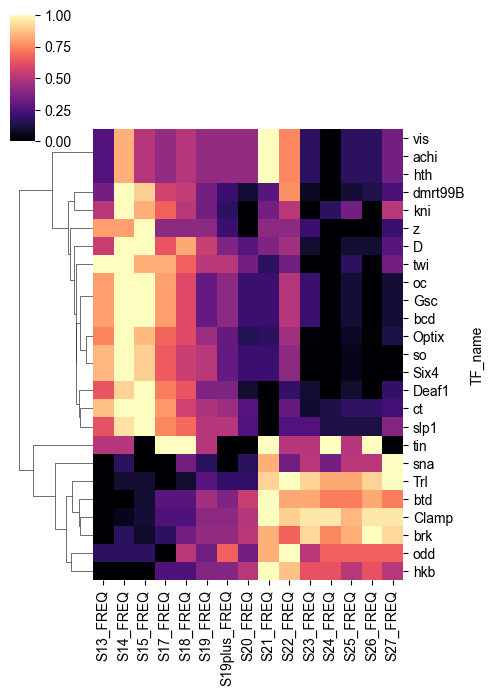

In [478]:
top_n = 25

species_keys = pd.DataFrame(pd.read_csv('jaspar_core_nr_UNIPROT_IDs_withspecies.csv', sep = "\t"))

sig_table = merged_table.loc[(merged_table.filter(like='CORR.P-VALUE') < 0.05).any(axis = 1)]
sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)

sig_table = sig_table.merge(species_keys, left_on = 'JASPAR_ID', right_on = 'full_list')

sig_enrichment_table = sig_table.sort_values(['mean_FREQ'], ascending = False)
sig_enrichment_table.index = sig_enrichment_table['TF_name']
sig_enrichment_table.drop('mean_FREQ', axis = 1, inplace = True)

dro_enrichment_table = sig_enrichment_table[sig_enrichment_table['Species_chars'] == 'Drosophila melanogaster']

dro_matrix = dro_enrichment_table.iloc[0:top_n].filter(like = '_FREQ')

clusters_drotop = sns.clustermap(dro_matrix, col_cluster = False, figsize = (5, 7), standard_scale = 'rows', cmap = 'magma')
clusters_drotop.savefig('HINT-ATAC_top' + str(top_n) +'_enrichment_drosophila.svg')

<ipython-input-120-dd8c069bd921>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)


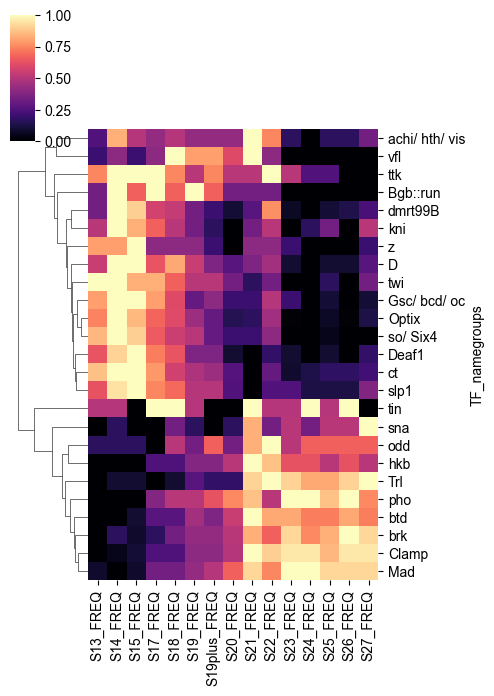

In [120]:
top_n = 25

species_keys = pd.DataFrame(pd.read_csv('jaspar_core_nr_UNIPROT_IDs_withspecies.csv', sep = "\t"))

sig_table = merged_table.loc[(merged_table.filter(like='CORR.P-VALUE') < 0.05).any(axis = 1)]
sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)

sig_table = sig_table.merge(species_keys, left_on = 'JASPAR_ID', right_on = 'full_list')

dro_enrichment_table = sig_enrichment_table[sig_enrichment_table['Species_chars'] == 'Drosophila melanogaster']

groupby = dro_enrichment_table.groupby([col for col in dro_enrichment_table.columns if '_FREQ' in col])
groupby_df = groupby['TF_name'].apply(list).reset_index()
groupby_df['TF_namegroups'] = groupby_df['TF_name'].apply(lambda x: '/ '.join(x))
groupby_df.index = groupby_df['TF_namegroups']
groupby_df = groupby_df.sort_values('mean_FREQ', ascending = False)
groupby_df = groupby_df.drop('mean_FREQ', axis = 1)

dro_matrix = groupby_df.iloc[0:top_n].filter(like = '_FREQ')

clusters_drotop = sns.clustermap(dro_matrix, col_cluster = False, figsize = (5, 7), standard_scale = 'rows', cmap = 'magma')
clusters_drotop.savefig('HINT-ATAC_top' + str(top_n) +'_enrichment_drosophila_grouped.svg')

plt.show()

,JASPAR_ID,UNIPROT_ID,mikado_gene,S13A1_EXPR,S13B1_EXPR,S13C1_EXPR,S19A1_EXPR,S19B1_EXPR,S19C1_EXPR,S21A_EXPR,...,S27_FREQ,S27_CORR.P-VALUE,mean_FREQ,S13_mean_expr,S19_mean_expr,S21_mean_expr,S23_mean_expr,full_list,UNIPROT_chars,Species_chars
1,MA0207.1,A1Z916,mikado.phaw_50.282260bG84,0.457,0.301,0.322,0.249,0.779,0.022,1.375,...,0.85,4.493900e-45,0.860667,0.360000,0.350000,1.496000,0.435000,MA0207.1,A1Z916,Drosophila melanogaster
2,MA0227.1,O46339,mikado.phaw_50.283815bG317,8.158,7.252,9.276,21.130,20.828,15.976,35.421,...,0.85,4.493900e-45,0.860667,8.228667,19.311333,36.745000,47.592667,MA0227.1,O46339,Drosophila melanogaster
3,MA0185.1,Q24180,mikado.phaw_50.283823cG590,0.000,0.114,0.113,0.677,0.089,0.000,1.142,...,0.84,3.559700e-05,0.858667,0.075667,0.255333,0.473000,0.607000,MA0185.1,Q24180,Drosophila melanogaster
5,MA0218.1,P10180,mikado.phaw_50.283865aG12,0.000,0.109,0.214,1.841,2.099,2.591,12.394,...,0.63,1.000000e+00,0.679333,0.107667,2.177000,14.677333,23.606000,MA0218.1,P10180,Drosophila melanogaster
30,MA0190.1,P54366,mikado.phaw_50.283828aG253,0.000,0.268,0.000,0.510,0.776,2.277,0.636,...,0.32,1.000000e+00,0.351333,0.089333,1.187667,0.413333,0.339333,MA0190.1,P54366,Drosophila melanogaster
67,MA1455.1,Q9VAI8,mikado.phaw_50.283867dG286,0.000,0.000,0.000,0.676,0.291,1.474,3.386,...,0.22,6.034200e-14,0.260667,0.000000,0.813667,2.917000,1.864667,MA1455.1,Q9VAI8,Drosophila melanogaster
78,MA0451.1,P10734,mikado.phaw_50.283866G145,0.614,1.871,2.965,42.795,47.405,45.826,12.545,...,0.25,6.940700e-01,0.243333,1.816667,45.342000,12.012333,30.290000,MA0451.1,P10734,Drosophila melanogaster
91,MA0242.1,Q24040,mikado.phaw_50.283874cG86,118.187,220.110,175.135,112.780,120.419,128.221,38.029,...,0.21,4.505800e-08,0.222667,171.144000,120.473333,39.380000,57.155333,MA0242.1,Q24040,Drosophila melanogaster
93,MA0535.1,P42003,mikado.phaw_50.283826G484,2.400,2.328,1.944,2.386,2.227,2.545,2.189,...,0.26,0.000000e+00,0.220667,2.224000,2.386000,2.044333,3.713333,MA0535.1,P42003,Drosophila melanogaster
107,MA0460.1,P17789,mikado.phaw_50.282861bG441,0.000,0.084,0.239,5.712,3.714,3.855,1.644,...,0.18,1.000000e+00,0.203333,0.107667,4.427000,1.801000,9.140667,MA0460.1,P17789,Drosophila melanogaster


{10: 0,
 8: 1,
 17: 2,
 7: 3,
 15: 4,
 13: 5,
 0: 6,
 1: 7,
 11: 8,
 18: 9,
 2: 10,
 3: 11,
 14: 12,
 4: 13,
 9: 14,
 5: 15,
 16: 16,
 6: 17,
 12: 18}

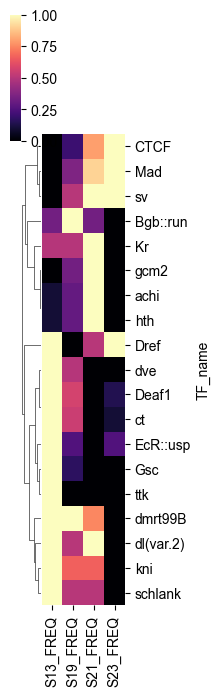

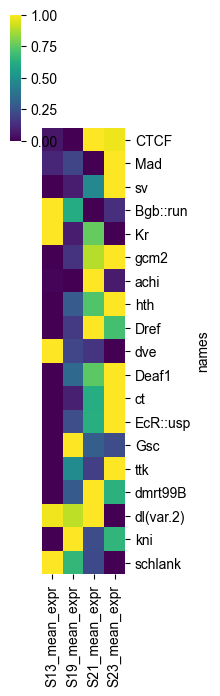

In [467]:
TF_enrich_expression_means_species = TF_enrich_expression_means.merge(species_keys, left_on = 'JASPAR_ID', right_on = 'full_list')
dro_enrich_expression_means = TF_enrich_expression_means_species[TF_enrich_expression_means_species['Species_chars'] == 'Drosophila melanogaster']

display(dro_enrich_expression_means)

stages = ['S13', 'S19', 'S21', 'S23']

dro_enrich_expression_stages = pd.DataFrame()

for stage in stages:
    stage_cols = [col for col in dro_enrich_expression_means.columns if stage in col]
    for col in stage_cols:
        if 'S19plus' in col:
            continue
        else:
            dro_enrich_expression_stages[col] = dro_enrich_expression_means[col]

mean_cols = [col for col in dro_enrich_expression_means.filter(like = '_mean_expr').columns]
dro_enrich_expression_stages.index = dro_enrich_expression_means['TF_name']

top_n = 30

freq_matrix = dro_enrich_expression_stages.iloc[0:top_n].filter(like = '_FREQ')

clusters = sns.clustermap(freq_matrix, row_cluster = True, col_cluster = False, figsize = (2.2, 7), standard_scale = 'rows', cmap = 'magma')
orders = clusters.dendrogram_row.reordered_ind
clusters.savefig('HINT_vs_RNA_top' + str(top_n) +'_enrichment_drosophila.svg')

expr_matrix = dro_enrich_expression_stages.iloc[0:top_n].filter(like = '_mean_expr')

reorder_dict = dict(zip(orders, np.arange(0, len(expr_matrix))))
display(reorder_dict)

expr_matrix['names'] = expr_matrix.index
expr_matrix['original_order'] = np.arange(0, len(expr_matrix))
expr_matrix.index = np.arange(0, len(expr_matrix))
reordered_matrix = expr_matrix.iloc[expr_matrix['original_order'].map(reorder_dict).sort_values().index]
reordered_matrix.index = reordered_matrix['names']
reordered_clean_matrix = reordered_matrix.filter(like = '_mean_expr')

clusters2 = sns.clustermap(reordered_clean_matrix, row_cluster = False, col_cluster = False, figsize = (2.2, 7), standard_scale = 'rows', cmap = 'viridis')
clusters2.savefig('HINT_vs_RNA_top' + str(top_n) +'_expression_drosophila.svg')

In [476]:
expression = pd.DataFrame(pd.read_csv(genes_TMMexprloc, sep = '\t'))
expression = expression.add_suffix('_EXPR')
expression = expression.rename({'Unnamed: 0_EXPR': 'mikado_gene'}, axis = 1)

sig_named = sig_table.merge(all_keys, left_on = 'JASPAR_ID', right_on = 'JASPAR_ID', how = 'left')
sig_named.dropna(inplace = True)

dro_named = sig_named[sig_named['Species_chars'] == 'Drosophila melanogaster']

display(dro_named)

,TF_name,JASPAR_ID,BACK.FREQ.,S13_FREQ,S13_CORR.P-VALUE,S14_FREQ,S14_CORR.P-VALUE,S15_FREQ,S15_CORR.P-VALUE,S17_FREQ,...,S26_FREQ,S26_CORR.P-VALUE,S27_FREQ,S27_CORR.P-VALUE,mean_FREQ,full_list,UNIPROT_chars,Species_chars,UNIPROT_ID,mikado_gene
132,Mad,MA0535.1,0.04,0.16,7.702300e-142,0.15,2.205000e-131,0.16,6.764000e-139,0.19,...,0.26,0.000000e+00,0.26,0.000000e+00,0.220667,MA0535.1,P42003,Drosophila melanogaster,P42003,mikado.phaw_50.283826G484
162,CTCF,MA0531.1,0.06,0.18,9.828400e-120,0.17,2.176500e-93,0.18,2.993500e-125,0.18,...,0.22,1.638900e-313,0.22,1.180800e-298,0.202000,MA0531.1,Q9VS55,Drosophila melanogaster,Q9VS55,mikado.phaw_50.007301aG217
471,sv,MA1461.1,0.05,0.11,1.278100e-53,0.11,4.507500e-50,0.11,1.135000e-55,0.12,...,0.15,2.335200e-178,0.15,5.077300e-182,0.134000,MA1461.1,O16804,Drosophila melanogaster,O16804,mikado.phaw_50.282639aG93
708,achi,MA0207.1,0.69,0.84,1.845400e-26,0.91,2.020400e-48,0.87,8.940000e-34,0.86,...,0.83,9.264600e-34,0.85,4.493900e-45,0.860667,MA0207.1,A1Z916,Drosophila melanogaster,A1Z916,mikado.phaw_50.282260bG84
709,hth,MA0227.1,0.69,0.84,1.845400e-26,0.91,2.020400e-48,0.87,8.940000e-34,0.86,...,0.83,9.264600e-34,0.85,4.493900e-45,0.860667,MA0227.1,O46339,Drosophila melanogaster,O46339,mikado.phaw_50.283815bG317
710,vis,MA0252.1,0.69,0.84,1.845400e-26,0.91,2.020400e-48,0.87,8.940000e-34,0.86,...,0.83,9.264600e-34,0.85,4.493900e-45,0.860667,MA0252.1,A1Z913,Drosophila melanogaster,A1Z913,mikado.phaw_50.282260bG84
733,gcm2,MA0917.1,0.11,0.17,5.455400e-25,0.16,1.783100e-18,0.17,3.601300e-24,0.16,...,0.17,4.499600e-37,0.17,8.840300e-41,0.173333,MA0917.1,Q9VLA2,Drosophila melanogaster,Q9VLA2,mikado.phaw_50.283869bG112
780,dmrt99B,MA1455.1,0.18,0.25,3.077000e-21,0.45,2.999600e-220,0.42,2.269700e-193,0.32,...,0.19,1.401000e-01,0.22,6.034200e-14,0.260667,MA1455.1,Q9VAI8,Drosophila melanogaster,Q9VAI8,mikado.phaw_50.283867dG286
881,schlank,MA0193.1,0.14,0.19,5.674700e-14,0.19,1.708800e-13,0.20,5.171500e-17,0.18,...,0.16,1.259400e-03,0.17,4.178000e-08,0.180000,MA0193.1,Q9W423,Drosophila melanogaster,Q9W423,mikado.phaw_50.283811G145
882,schlank,MA0193.1,0.14,0.19,5.674700e-14,0.19,1.708800e-13,0.20,5.171500e-17,0.18,...,0.16,1.259400e-03,0.17,4.178000e-08,0.180000,MA0193.1,Q9W423,Drosophila melanogaster,Q9W423,mikado.phaw_50.283811G145


In [156]:
acoresplit_directory = "enrichment_specific_9acoresplit/"

jaspar_core_mtf = pd.DataFrame(pd.read_csv('jaspar_core_nr.mtf', sep = '\t', header = None))

merged_table_acores = pd.DataFrame()

acore_to_cluster_dict = {5: 'Cluster1',
                         8: 'Cluster2',
                         4: 'Cluster3',
                         7: 'Cluster4',
                         2: 'Cluster5',
                         6: 'Cluster6',
                         1: 'Cluster7',
                         0: 'Cluster8',
                         3: 'Cluster9'}

acores = 9
for acore in np.arange(1, acores + 1):
    basedir = acoresplit_directory + 'Sall_hintatac_specific_acore*_unique/'.replace('*', str(acore))
    txtloc = basedir + 'fulltest_statistics.txt'
    enrichment_table = pd.DataFrame(pd.read_csv(txtloc, sep = '\t'))
    enrichment_table['FREQ'] = enrichment_table['FREQ'].str.split('%', expand = True)[0]
    enrichment_table['FREQ'] = enrichment_table['FREQ'].astype('float')
    enrichment_table['BACK.FREQ.'] = enrichment_table['BACK.FREQ.'].str.split('%', expand = True)[0]
    enrichment_table['BACK.FREQ.'] = enrichment_table['BACK.FREQ.'].astype('float')
    enrichment_table = enrichment_table.merge(jaspar_core_mtf[[0, 3]], left_on = 'FACTOR', right_on = 0, how = 'left')
    if acore == 1:
        merged_table_acores = enrichment_table[[3, 'FACTOR', 'BACK.FREQ.', 'FREQ', 'CORR.P-VALUE']]
        merged_table_acores = merged_table_acores.add_prefix(acore_to_cluster_dict[acore - 1] + '_')
        merged_table_acores = merged_table_acores.rename({'Cluster8_3': 'TF_name', 'Cluster8_FACTOR': 'JASPAR_ID', 'Cluster8_BACK.FREQ.': 'BACK.FREQ.'}, axis = 1)
    else:
        frame_fragment = enrichment_table[['FREQ', 'CORR.P-VALUE']]
        frame_fragment = frame_fragment.add_prefix(acore_to_cluster_dict[acore - 1] + '_')
        frame_fragment['JASPAR_ID'] = enrichment_table['FACTOR']
        merged_table_acores = merged_table_acores.merge(frame_fragment)
display(merged_table_acores)

,TF_name,JASPAR_ID,BACK.FREQ.,Cluster8_FREQ,Cluster8_CORR.P-VALUE,Cluster7_FREQ,Cluster7_CORR.P-VALUE,Cluster5_FREQ,Cluster5_CORR.P-VALUE,Cluster9_FREQ,...,Cluster3_FREQ,Cluster3_CORR.P-VALUE,Cluster1_FREQ,Cluster1_CORR.P-VALUE,Cluster6_FREQ,Cluster6_CORR.P-VALUE,Cluster4_FREQ,Cluster4_CORR.P-VALUE,Cluster2_FREQ,Cluster2_CORR.P-VALUE
0,MOT3,MA0340.1,3.54,7.36,0.0,6.03,0.000000e+00,7.11,0.000000e+00,6.46,...,7.68,0.000000e+00,7.09,0.000000e+00,6.47,0.000000e+00,8.53,0.000000e+00,7.02,0.000000e+00
1,dmrt99B,MA1455.1,0.18,4.75,0.0,0.25,9.007300e-27,0.25,8.438900e-34,0.61,...,0.43,3.221200e-285,0.57,0.000000e+00,0.29,2.837400e-72,0.27,1.237000e-44,1.50,0.000000e+00
2,MSN2,MA0341.1,1.28,4.74,0.0,3.88,0.000000e+00,4.24,0.000000e+00,2.49,...,3.00,0.000000e+00,3.49,0.000000e+00,3.51,0.000000e+00,3.71,0.000000e+00,3.37,0.000000e+00
3,MSN4,MA0342.1,1.28,4.74,0.0,3.88,0.000000e+00,4.24,0.000000e+00,2.49,...,3.00,0.000000e+00,3.49,0.000000e+00,3.51,0.000000e+00,3.71,0.000000e+00,3.37,0.000000e+00
4,RGM1,MA0366.1,1.28,4.74,0.0,3.88,0.000000e+00,4.24,0.000000e+00,2.49,...,3.00,0.000000e+00,3.49,0.000000e+00,3.51,0.000000e+00,3.71,0.000000e+00,3.37,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,Ptx1,MA0201.1,0.11,0.06,1.0,0.06,1.000000e+00,0.06,1.000000e+00,0.11,...,0.08,1.000000e+00,0.22,1.063100e-289,0.07,1.000000e+00,0.05,1.000000e+00,0.19,3.280000e-83
1642,dve,MA0915.1,0.11,0.06,1.0,0.11,6.275800e-01,0.13,4.019000e-04,0.13,...,0.16,9.342800e-19,0.27,0.000000e+00,0.13,9.821900e-03,0.16,1.588000e-17,0.21,2.213900e-114
1643,PAX4,MA0068.2,0.14,0.05,1.0,0.11,1.000000e+00,0.13,1.000000e+00,0.20,...,0.14,8.423900e-01,0.21,6.677100e-90,0.14,1.000000e+00,0.16,4.259200e-03,0.21,3.858900e-44
1644,prd,MA0239.1,0.26,0.00,1.0,0.00,1.000000e+00,0.00,1.000000e+00,0.00,...,0.00,1.000000e+00,0.00,1.000000e+00,0.00,1.000000e+00,0.00,1.000000e+00,0.00,1.000000e+00


<ipython-input-157-d6578759dd50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)


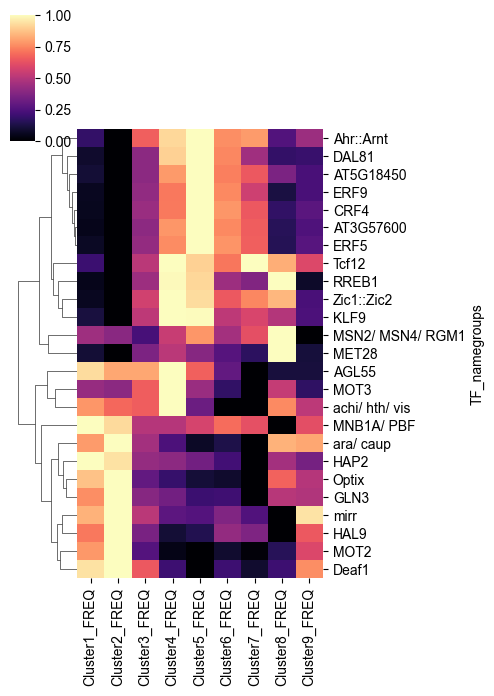

In [157]:
top_n = 25

sig_table = merged_table_acores.loc[(merged_table_acores.filter(like='CORR.P-VALUE') < 0.05).any(axis = 1)]
sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)

groupby = sig_table.groupby([col for col in sig_table.columns if '_FREQ' in col])
groupby_df = groupby['TF_name'].apply(list).reset_index()
groupby_df['TF_namegroups'] = groupby_df['TF_name'].apply(lambda x: '/ '.join(x))
groupby_df.index = groupby_df['TF_namegroups']
groupby_df = groupby_df.sort_values('mean_FREQ', ascending = False)
groupby_df = groupby_df.drop('mean_FREQ', axis = 1)

all_matrix = groupby_df.iloc[0:top_n].filter(like = '_FREQ')
all_matrix = all_matrix[sorted(all_matrix.columns)]

clusters_top_enrich = sns.clustermap(all_matrix, row_cluster = True, col_cluster = False, figsize = (5, 7), standard_scale = 'rows', cmap = 'magma')
clusters_top_enrich.savefig('HINT-ATAC_top' + str(top_n) + '_enrichment_acores_clustered.svg')

plt.show()

<ipython-input-160-56141c77c30f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)


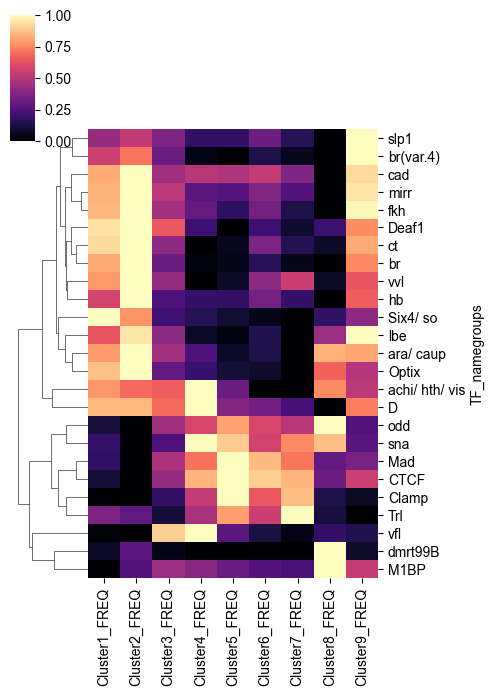

In [160]:
top_n = 25

species_keys = pd.DataFrame(pd.read_csv('jaspar_core_nr_UNIPROT_IDs_withspecies.csv', sep = "\t"))

sig_table = merged_table_acores.loc[(merged_table_acores.filter(like='CORR.P-VALUE') < 0.05).any(axis = 1)]
sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)

sig_table = sig_table.merge(species_keys, left_on = 'JASPAR_ID', right_on = 'full_list')
dro_enrichment_table = sig_table[sig_table['Species_chars'] == 'Drosophila melanogaster']

groupby = dro_enrichment_table.groupby([col for col in dro_enrichment_table.columns if '_FREQ' in col])
groupby_df = groupby['TF_name'].apply(list).reset_index()
groupby_df['TF_namegroups'] = groupby_df['TF_name'].apply(lambda x: '/ '.join(x))
groupby_df.index = groupby_df['TF_namegroups']
groupby_df = groupby_df.sort_values('mean_FREQ', ascending = False)
groupby_df = groupby_df.drop('mean_FREQ', axis = 1)

dro_matrix = groupby_df.iloc[0:top_n].filter(like = '_FREQ')
dro_matrix = dro_matrix[sorted(dro_matrix.columns)]

clusters_drotop = sns.clustermap(dro_matrix, row_cluster = True, col_cluster = False, figsize = (5, 7), standard_scale = 'rows', cmap = 'magma')
#clusters_drotop.savefig('HINT-ATAC_top' + str(top_n) +'_enrichment_acores_drosophila.svg')
plt.show()

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
MNB1A/ PBF,5.16,4.99,4.02,4.02,4.19,4.46,4.30,2.88,4.28
HAP2,5.13,5.04,4.25,4.22,4.12,3.94,3.61,4.30,4.13
Dof2,1.66,1.54,1.12,1.09,1.14,1.17,1.14,0.59,1.33
Six4/ so,1.43,1.24,0.76,0.71,0.66,0.62,0.58,0.73,0.92
lin-14,1.38,1.17,1.22,1.21,1.23,1.12,1.01,0.90,1.23
YAP5,1.28,1.22,0.84,0.72,0.76,0.84,0.73,0.58,0.95
ZNF354C,1.01,1.00,0.72,0.66,0.64,0.61,0.57,0.75,0.71
REF6,1.00,0.92,0.69,0.67,0.67,0.67,0.61,0.73,0.72
AT3G46070,0.92,0.87,0.62,0.66,0.74,0.73,0.78,0.57,0.78


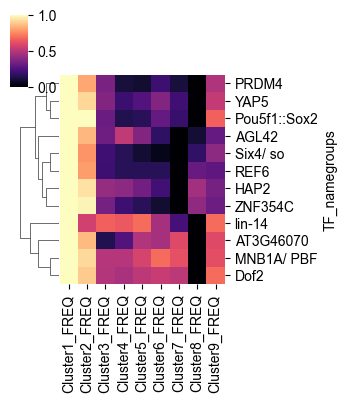

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
mirr,6.45,7.09,5.14,4.21,4.13,4.58,4.10,3.10,6.86
Optix,4.66,5.00,3.12,2.84,2.61,2.55,2.33,4.12,3.66
ara/ caup,4.54,4.97,3.86,3.42,3.08,3.20,2.93,4.64,4.59
MOT2,3.69,4.21,2.43,1.90,1.80,2.01,1.84,2.17,3.23
GLN3,3.66,4.12,2.92,2.82,2.56,2.58,2.17,3.15,3.12
HAL9,3.23,3.51,2.87,2.62,2.66,2.93,2.88,2.52,3.16
OBP3,1.67,2.24,0.91,0.71,0.70,0.87,0.68,0.61,1.36
AT5G66940,1.54,1.94,0.73,0.53,0.56,0.62,0.47,0.53,1.14
AT1G69570,1.51,1.91,0.73,0.55,0.55,0.68,0.53,0.48,1.12


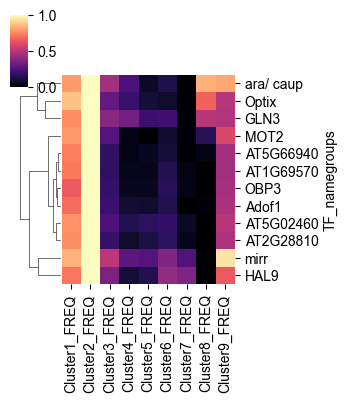

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
RUNX1,0.74,0.63,0.79,0.73,0.63,0.62,0.50,0.62,0.67
Arnt,0.58,0.55,0.79,0.76,0.65,0.52,0.56,0.38,0.57
TGA7,0.40,0.34,0.72,0.59,0.65,0.58,0.69,0.48,0.67
bZIP910,0.48,0.43,0.71,0.63,0.60,0.58,0.66,0.61,0.71
SOX8,0.69,0.70,0.71,0.65,0.48,0.45,0.43,0.24,0.66
TGA4,0.45,0.43,0.69,0.60,0.64,0.58,0.68,0.66,0.69
CBF1,0.45,0.46,0.65,0.62,0.51,0.42,0.45,0.29,0.46
NKX2-2,0.63,0.55,0.65,0.64,0.62,0.60,0.53,0.40,0.52
BEH2,0.45,0.45,0.64,0.60,0.55,0.47,0.44,0.61,0.50


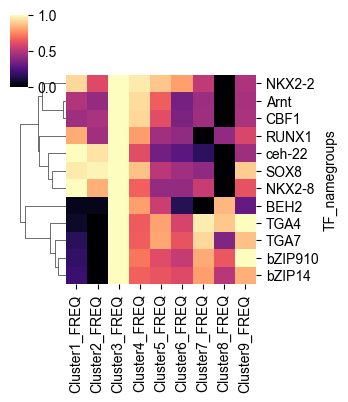

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
MOT3,7.09,7.02,7.68,8.53,7.11,6.47,6.03,7.36,6.46
KLF9,0.66,0.48,1.28,2.02,2.01,1.28,1.38,1.24,0.85
Tcf12,1.03,0.84,1.32,1.78,1.69,1.51,1.78,1.62,1.40
ASCL1(var.2),0.67,0.53,1.20,1.74,1.55,1.32,1.46,0.90,0.94
Zic1::Zic2,0.76,0.70,1.26,1.69,1.62,1.34,1.44,1.54,0.93
achi/ hth/ vis,1.56,1.52,1.51,1.65,1.37,1.24,1.24,1.55,1.45
TCF12(var.2),0.56,0.49,1.09,1.60,1.48,1.35,1.33,0.74,0.83
AGL55,1.57,1.54,1.54,1.59,1.50,1.40,1.32,1.35,1.35
Zic2,0.74,0.60,1.10,1.52,1.49,1.14,1.25,1.41,0.85


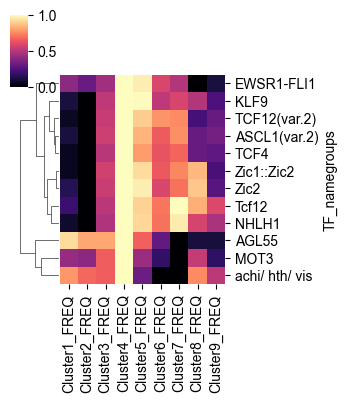

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
CRF4,0.48,0.36,1.30,1.93,2.54,2.06,1.77,0.75,0.96
AT3G57600,0.50,0.40,1.20,1.96,2.40,1.90,1.72,0.71,0.90
ERF9,0.51,0.39,1.21,1.82,2.38,1.89,1.50,0.63,0.85
ERF5,0.48,0.34,1.18,1.87,2.35,1.90,1.67,0.64,0.88
AT5G18450,0.68,0.50,1.22,1.93,2.32,1.83,1.68,1.15,0.92
ERF118,0.46,0.30,1.08,1.73,2.29,1.85,1.65,0.60,0.88
ESE1,0.44,0.32,1.21,1.81,2.25,1.87,1.57,0.52,0.87
AT2G33710,0.42,0.35,1.18,1.82,2.25,1.91,1.69,0.58,0.91
ERF15,0.48,0.33,1.19,1.82,2.22,1.79,1.53,0.64,0.89


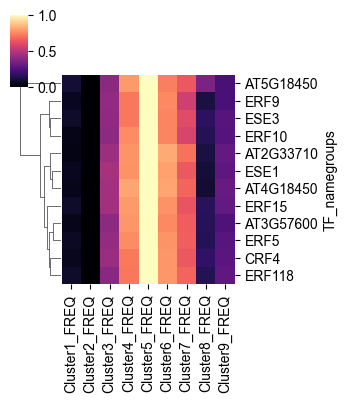

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
NR5A1,0.49,0.48,0.40,0.48,0.71,1.23,0.60,0.38,0.57
Dof3,0.87,0.81,0.86,0.94,1.00,1.09,0.99,0.41,0.88
ESRRA,0.67,0.57,0.39,0.39,0.59,1.04,0.58,0.40,0.58
Esrrg,0.48,0.52,0.36,0.34,0.56,1.03,0.62,0.33,0.52
Nr5a2,0.55,0.52,0.36,0.41,0.61,1.00,0.50,0.41,0.46
PRDM1,0.82,0.86,0.56,0.63,0.79,1.00,0.85,0.42,0.62
OSR2,0.71,0.79,0.82,0.97,0.99,0.99,0.95,0.67,0.83
ESRRB,0.55,0.62,0.32,0.31,0.50,0.97,0.55,0.35,0.50
NR2C2(var.2),0.48,0.48,0.31,0.28,0.47,0.82,0.77,0.37,0.49


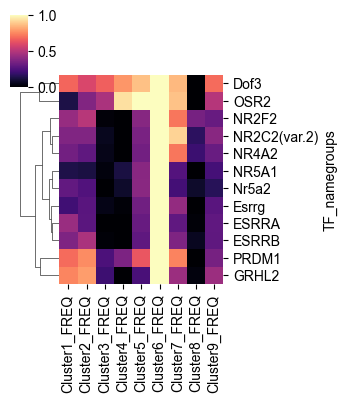

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
Tcf12,1.03,0.84,1.32,1.78,1.69,1.51,1.78,1.62,1.40
PHD1,0.92,0.70,1.25,1.13,1.26,1.19,1.71,1.17,1.10
Ascl2,0.75,0.66,1.18,1.49,1.49,1.29,1.56,1.17,1.15
Trl,0.99,0.93,0.78,1.07,1.34,1.14,1.50,0.79,0.70
RAMOSA1,0.75,0.80,0.77,1.09,1.43,1.14,1.48,0.90,0.60
MYOG,0.80,0.61,1.04,1.25,1.26,1.15,1.44,1.20,1.06
ASCL1,0.55,0.43,0.94,1.27,1.23,1.09,1.37,0.87,0.85
BPC6,0.93,0.92,0.71,0.98,1.28,1.07,1.33,0.65,0.70
BHLHE22(var.2),0.59,0.46,0.92,1.18,1.18,1.04,1.32,0.99,0.80


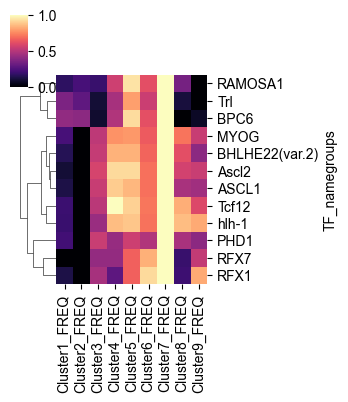

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
dmrt99B,0.57,1.50,0.43,0.27,0.25,0.29,0.25,4.75,0.61
MSN2/ MSN4/ RGM1,3.49,3.37,3.00,3.71,4.24,3.51,3.88,4.74,2.49
Sox17,0.51,1.35,0.54,0.57,0.42,0.41,0.33,4.54,0.44
DMRTC2,0.67,1.53,0.42,0.33,0.27,0.34,0.31,4.38,0.60
DMRTA2,0.59,1.37,0.43,0.29,0.26,0.32,0.28,3.88,0.57
MET28,1.83,1.66,2.29,2.55,2.33,2.12,1.95,3.40,1.85
Dmrt1,0.57,1.28,0.48,0.37,0.29,0.34,0.29,3.37,0.63
NR1D1,0.37,0.88,0.40,0.48,0.44,0.42,0.47,3.09,0.35
NR1D2,0.37,0.86,0.40,0.47,0.45,0.37,0.39,3.01,0.36


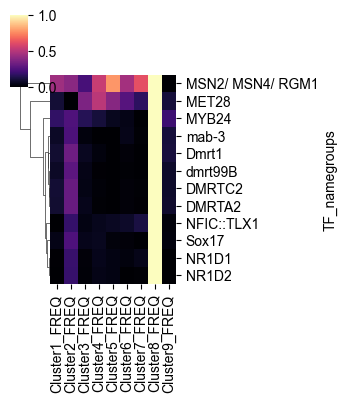

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
FOXC2,1.07,1.11,0.75,0.53,0.50,0.65,0.55,0.37,1.54
FOXP1,0.76,0.86,0.80,0.57,0.56,0.68,0.55,0.34,1.53
Foxj3,0.92,0.93,0.72,0.54,0.51,0.62,0.54,0.31,1.51
NCU00019,0.76,0.79,0.76,0.53,0.53,0.61,0.51,0.26,1.49
FOXA3,0.75,0.75,0.80,0.56,0.57,0.67,0.55,0.30,1.48
FOXA2,0.75,0.76,0.80,0.55,0.56,0.62,0.53,0.30,1.47
FKH2,0.77,0.88,0.83,0.64,0.60,0.75,0.64,0.37,1.47
Foxl2,0.77,0.92,0.72,0.46,0.45,0.57,0.47,0.29,1.46
FOXP2,0.86,0.94,0.79,0.58,0.59,0.69,0.60,0.42,1.45


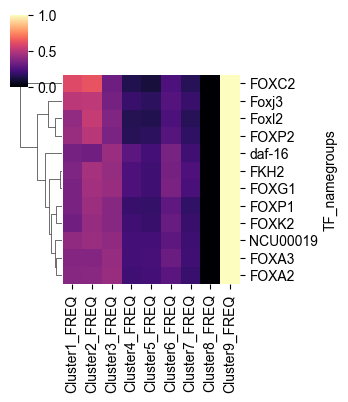

In [216]:
sig_table = merged_table_acores.loc[(merged_table_acores.filter(like='CORR.P-VALUE') < 0.05).any(axis = 1)]

groupby = sig_table.groupby([col for col in sig_table.columns if '_FREQ' in col])
groupby_df = groupby['TF_name'].apply(list).reset_index()
groupby_df['TF_namegroups'] = groupby_df['TF_name'].apply(lambda x: '/ '.join(x))
groupby_df.index = groupby_df['TF_namegroups']
merged_acore_freq = groupby_df.filter(like='FREQ')

merged_acore_freq = merged_acore_freq[sorted(merged_acore_freq.columns)]
merged_acore_freq['max_Clusters'] = merged_acore_freq.apply(lambda x: [i for i in np.arange(1, len(x) + 1) if x[i - 1] == x.max()], axis = 1)

clusters = 9
topn_tfs = 12

for cluster in np.arange(1, clusters + 1):
    acore_top = merged_acore_freq[merged_acore_freq['max_Clusters'].apply(lambda x: cluster in x)]
    acore_top = acore_top.sort_values('Cluster' + str(cluster) + '_FREQ', ascending = False).filter(like = '_FREQ')
    acore_top = acore_top.iloc[0:topn_tfs]
    display(acore_top)
    acore_clustermap = sns.clustermap(acore_top, row_cluster = True, col_cluster = False, figsize = (3.5, 4), standard_scale = 'rows', cmap = 'magma')
    acore_clustermap.savefig('HINT-ATAC_top' + str(top_n) +'_enrichment_Cluster' + str(cluster) + '.svg')
    plt.show()

In [247]:
display(sig_table[sig_table['TF_name'].apply(lambda x: 'FOXK2' in x)])

,TF_name,JASPAR_ID,BACK.FREQ.,Cluster8_FREQ,Cluster8_CORR.P-VALUE,Cluster7_FREQ,Cluster7_CORR.P-VALUE,Cluster5_FREQ,Cluster5_CORR.P-VALUE,Cluster9_FREQ,...,Cluster6_FREQ,Cluster6_CORR.P-VALUE,Cluster4_FREQ,Cluster4_CORR.P-VALUE,Cluster2_FREQ,Cluster2_CORR.P-VALUE,mean_FREQ,full_list,UNIPROT_chars,Species_chars
1282,FOXK2,MA1103.2,0.41,0.35,1.0,0.56,1.013800e-47,0.56,3.265600e-66,1.44,...,0.69,3.631300e-187,0.58,5.302200e-70,0.81,0.0,0.718889,MA1103.2,Q01167,Homo sapiens


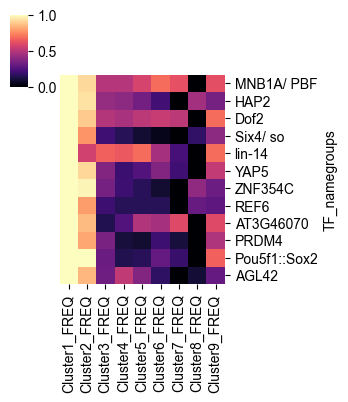

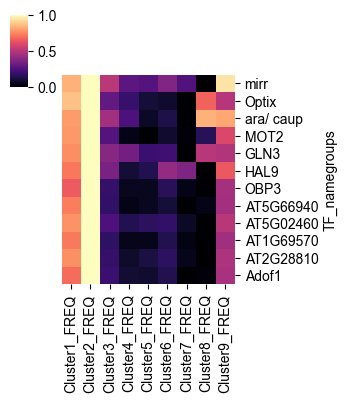

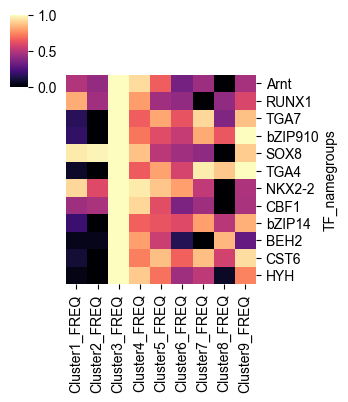

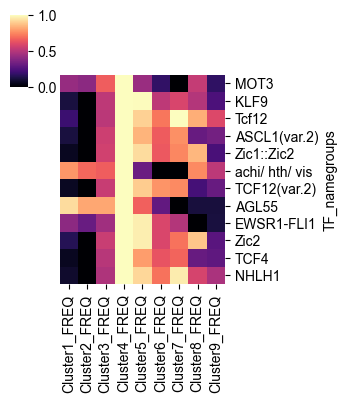

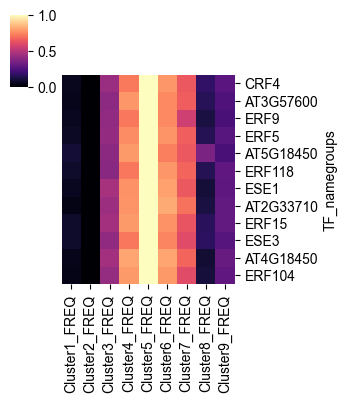

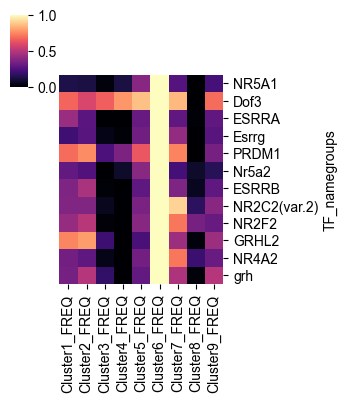

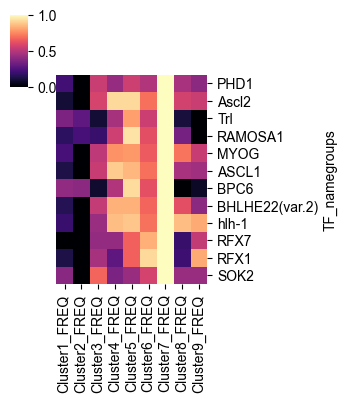

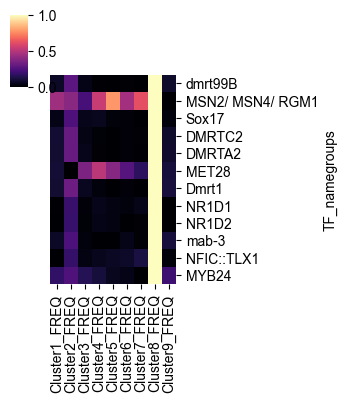

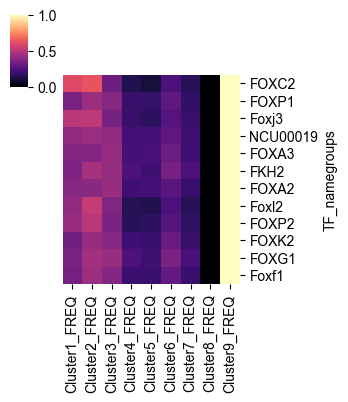

In [210]:
sig_table = merged_table_acores.loc[(merged_table_acores.filter(like='CORR.P-VALUE') < 0.05).any(axis = 1)]

groupby = sig_table.groupby([col for col in sig_table.columns if '_FREQ' in col])
groupby_df = groupby['TF_name'].apply(list).reset_index()
groupby_df['TF_namegroups'] = groupby_df['TF_name'].apply(lambda x: '/ '.join(x))
groupby_df.index = groupby_df['TF_namegroups']
merged_acore_freq = groupby_df.filter(like='FREQ')

merged_acore_freq = merged_acore_freq[sorted(merged_acore_freq.columns)]
merged_acore_freq['max_Cluster'] = merged_acore_freq.idxmax(axis = 1).apply(lambda x: int(x.replace('Cluster', '').replace('_FREQ', '')))

clusters = 9
topn_tfs = 12

for cluster in np.arange(1, clusters + 1):
    acore_top = merged_acore_freq[merged_acore_freq['max_Cluster'] == cluster]
    acore_top = acore_top.sort_values('Cluster' + str(cluster) + '_FREQ', ascending = False).filter(like = '_FREQ')
    acore_top = acore_top.iloc[0:topn_tfs]
    acore_clustermap = sns.clustermap(acore_top, row_cluster = False, col_cluster = False, figsize = (3.5, 4), standard_scale = 'rows', cmap = 'magma')
    #acore_clustermap.savefig('HINT-ATAC_top' + str(top_n) +'_enrichment_Cluster' + str(cluster) + '.svg')
    plt.show()

<ipython-input-243-a3f98c9217e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)


,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
Deaf1,1.54,1.49,1.49,1.32,1.23,1.34,1.38,1.13,1.48
Six4/ so,1.45,1.32,0.89,0.84,0.75,0.74,0.73,0.85,0.95
Gsc/ oc/ bcd,0.71,0.68,0.49,0.51,0.47,0.46,0.41,0.33,0.49
su(Hw),0.70,0.70,0.58,0.46,0.44,0.54,0.54,0.32,0.65
sd,0.64,0.64,0.44,0.39,0.35,0.44,0.38,0.25,0.54
br(var.2),0.58,0.56,0.31,0.22,0.20,0.27,0.26,0.16,0.45
Abd-B,0.44,0.41,0.21,0.24,0.26,0.27,0.27,0.14,0.31
dve,0.26,0.21,0.17,0.18,0.17,0.15,0.15,0.08,0.15
Ptx1,0.22,0.19,0.10,0.08,0.09,0.10,0.10,0.08,0.11


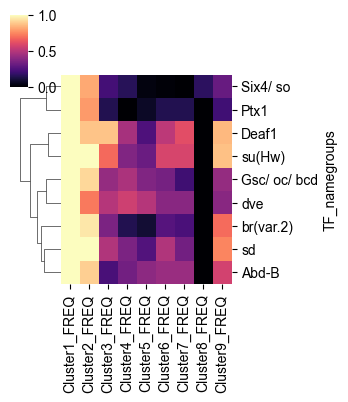

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
mirr,6.67,7.45,5.50,4.66,4.50,4.92,4.84,3.65,6.47
Optix,4.79,5.29,3.49,3.21,2.93,2.96,2.79,4.76,3.71
hb,1.10,1.49,0.79,0.78,0.76,0.93,0.84,0.47,1.12
ct,1.29,1.37,1.00,0.73,0.71,0.91,0.83,0.68,1.15
br,1.15,1.37,0.73,0.54,0.53,0.61,0.56,0.49,0.98
lbe,1.05,1.29,0.90,0.59,0.50,0.58,0.52,0.86,1.23
vvl,1.14,1.28,0.95,0.71,0.78,0.95,1.20,0.74,1.14
tll,0.85,1.01,0.51,0.39,0.39,0.48,0.47,0.53,0.59
CG4328-RA,0.80,0.98,0.64,0.66,0.70,0.73,0.70,0.30,0.86


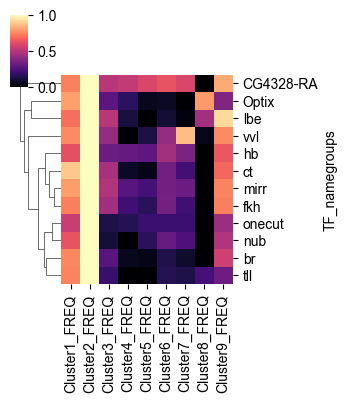

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
vfl,0.50,0.48,0.95,0.88,0.54,0.51,0.53,0.60,0.61
Bgb::run,0.47,0.55,0.67,0.56,0.44,0.44,0.43,0.49,0.56
tin,0.57,0.60,0.64,0.61,0.55,0.58,0.63,0.46,0.56
twi,0.51,0.50,0.59,0.55,0.45,0.37,0.44,0.50,0.52


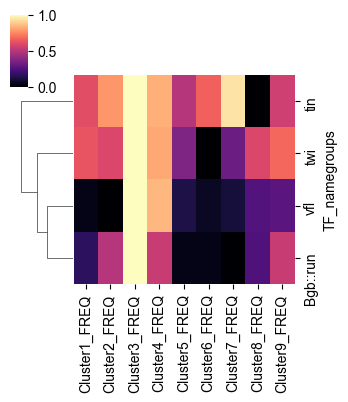

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
D,0.87,0.91,0.88,1.00,0.75,0.70,0.68,0.42,0.82
pho,0.40,0.33,0.65,0.84,0.84,0.80,0.76,0.32,0.60
opa,0.35,0.27,0.48,0.77,0.74,0.68,0.75,0.63,0.41
Su(H),0.56,0.54,0.60,0.69,0.50,0.46,0.42,0.55,0.47
hkb,0.38,0.31,0.54,0.67,0.59,0.51,0.52,0.49,0.43
sv,0.36,0.31,0.54,0.66,0.63,0.65,0.63,0.38,0.52
eve/ zen,0.27,0.33,0.30,0.37,0.36,0.29,0.23,0.25,0.25
Dll,0.27,0.32,0.25,0.32,0.27,0.24,0.21,0.16,0.25
Dr,0.23,0.24,0.21,0.26,0.26,0.24,0.18,0.10,0.19


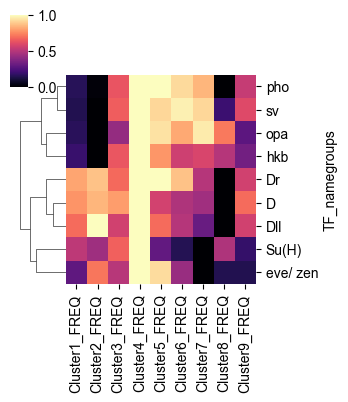

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
Clamp,0.62,0.59,0.89,1.35,1.87,1.58,1.81,0.91,0.78
Mad,0.47,0.32,0.94,1.15,1.40,1.40,1.32,0.66,0.86
pho,0.40,0.33,0.65,0.84,0.84,0.80,0.76,0.32,0.60
btd,0.34,0.29,0.53,0.73,0.82,0.67,0.71,0.55,0.43
Dref,0.33,0.36,0.30,0.37,0.48,0.32,0.36,0.12,0.32
h,0.16,0.15,0.34,0.40,0.43,0.37,0.38,0.35,0.27
pnr,0.31,0.33,0.26,0.32,0.42,0.30,0.35,0.13,0.28
BEAF-32,0.19,0.21,0.15,0.20,0.28,0.19,0.19,0.06,0.17
Dr,0.23,0.24,0.21,0.26,0.26,0.24,0.18,0.10,0.19


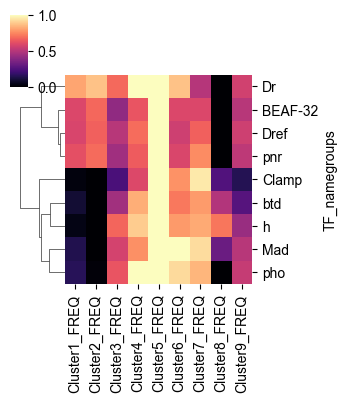

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
Mad,0.47,0.32,0.94,1.15,1.40,1.40,1.32,0.66,0.86
grh,0.47,0.61,0.40,0.31,0.39,0.78,0.61,0.45,0.57
pan,0.51,0.52,0.57,0.55,0.61,0.64,0.63,0.31,0.62


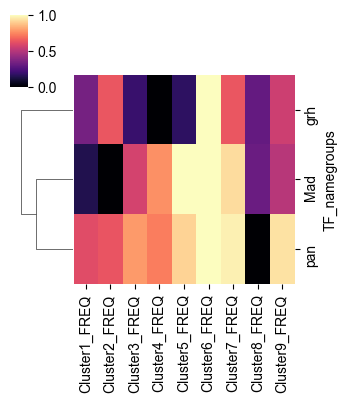

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
Trl,1.00,0.92,0.89,1.14,1.40,1.31,1.58,0.76,0.86
CTCF,0.44,0.39,0.63,0.74,0.76,0.79,0.86,0.54,0.66
brk,0.32,0.26,0.56,0.67,0.77,0.75,0.78,0.49,0.51
EcR::usp,0.60,0.60,0.45,0.40,0.39,0.52,0.66,0.53,0.52
cnc::maf-S,0.58,0.62,0.62,0.62,0.57,0.58,0.64,0.58,0.59
usp,0.41,0.32,0.33,0.32,0.42,0.43,0.58,0.44,0.37
Ets21C,0.28,0.32,0.32,0.33,0.33,0.32,0.35,0.30,0.30
Eip74EF,0.20,0.25,0.21,0.21,0.22,0.21,0.26,0.22,0.20


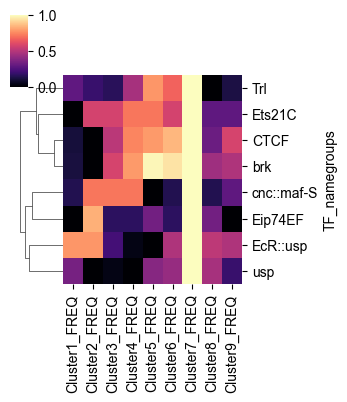

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
dmrt99B,0.65,2.14,0.54,0.39,0.32,0.41,0.42,7.50,0.66
ara/ caup,4.73,5.31,4.16,3.79,3.41,3.47,3.46,5.48,4.53
vis/ achi/ hth,1.62,1.61,1.67,1.84,1.56,1.39,1.54,1.96,1.57
M1BP,0.58,0.74,0.80,0.78,0.67,0.71,0.78,1.50,0.82
odd,0.82,0.77,0.96,1.05,0.98,1.00,1.09,1.22,0.93
sna,0.72,0.64,0.82,1.02,0.91,0.88,1.05,1.14,0.85
gcm2,0.34,0.36,0.39,0.44,0.37,0.34,0.33,0.61,0.30
ttk,0.42,0.47,0.37,0.42,0.39,0.36,0.27,0.48,0.32


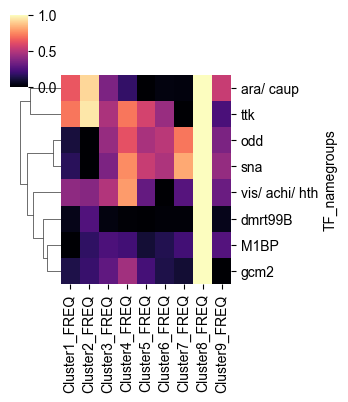

,Cluster1_FREQ,Cluster2_FREQ,Cluster3_FREQ,Cluster4_FREQ,Cluster5_FREQ,Cluster6_FREQ,Cluster7_FREQ,Cluster8_FREQ,Cluster9_FREQ
TF_namegroups,,,,,,,,,
br(var.4),1.06,1.21,0.81,0.56,0.49,0.60,0.59,0.40,1.27
slp1,0.90,1.04,0.84,0.63,0.63,0.75,0.70,0.49,1.22
ovo,0.57,0.59,0.60,0.55,0.50,0.50,0.60,0.51,0.67
gt,0.20,0.23,0.19,0.18,0.17,0.19,0.18,0.13,0.25


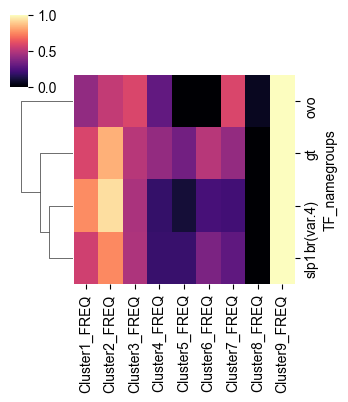

In [243]:
species_keys = pd.DataFrame(pd.read_csv('jaspar_core_nr_UNIPROT_IDs_withspecies.csv', sep = "\t"))

sig_table = merged_table_acores.loc[(merged_table_acores.filter(like='CORR.P-VALUE') < 0.05).any(axis = 1)]
sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)

sig_table = sig_table.merge(species_keys, left_on = 'JASPAR_ID', right_on = 'full_list')

dro_enrichment_table = sig_enrichment_table[sig_enrichment_table['Species_chars'] == 'Drosophila melanogaster']

groupby = dro_enrichment_table.groupby([col for col in dro_enrichment_table.columns if '_FREQ' in col])
groupby_df = groupby['TF_name'].apply(list).reset_index()
groupby_df['TF_namegroups'] = groupby_df['TF_name'].apply(lambda x: '/ '.join(x))
groupby_df.index = groupby_df['TF_namegroups']
merged_acore_freq = groupby_df.filter(like='FREQ')
merged_acore_freq = merged_acore_freq[sorted(merged_acore_freq.columns)]

merged_acore_freq['max_Clusters'] = merged_acore_freq.apply(lambda x: [i for i in np.arange(1, len(x) + 1) if x[i - 1] == x.max()], axis = 1)

acores = 9
topn_tfs = 12

for cluster in np.arange(1, clusters + 1):
    acore_top = merged_acore_freq[merged_acore_freq['max_Clusters'].apply(lambda x: cluster in x)]
    acore_top = acore_top.sort_values('Cluster' + str(cluster) + '_FREQ', ascending = False).filter(like = '_FREQ')
    acore_top = acore_top.iloc[0:topn_tfs]
    display(acore_top)
    acore_clustermap = sns.clustermap(acore_top, row_cluster = True, col_cluster = False, figsize = (3.5, 4), standard_scale = 'rows', cmap = 'magma')
    acore_clustermap.savefig('HINT-ATAC_top' + str(top_n) +'_enrichment_Cluster' + str(cluster) + '_Drosophila.svg')
    plt.show()

In [245]:
display(sig_table[sig_table['TF_name'].apply(lambda x: 'sna' in x)])

,TF_name,JASPAR_ID,BACK.FREQ.,Cluster8_FREQ,Cluster8_CORR.P-VALUE,Cluster7_FREQ,Cluster7_CORR.P-VALUE,Cluster5_FREQ,Cluster5_CORR.P-VALUE,Cluster9_FREQ,...,Cluster6_FREQ,Cluster6_CORR.P-VALUE,Cluster4_FREQ,Cluster4_CORR.P-VALUE,Cluster2_FREQ,Cluster2_CORR.P-VALUE,mean_FREQ,full_list,UNIPROT_chars,Species_chars
65,sna,MA0086.2,0.12,0.91,0.0,0.87,0.0,0.92,0.0,0.69,...,0.8,0.0,0.96,0.0,0.59,0.0,0.786667,MA0086.2,P08044,Drosophila melanogaster


<ipython-input-105-91e632a249fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)
<ipython-input-105-91e632a249fd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_acore_freq['max_acore'] = merged_acore_freq.idxmax(axis = 1).apply(lambda x: int(x.replace('acore', '').replace('_FREQ', '')))


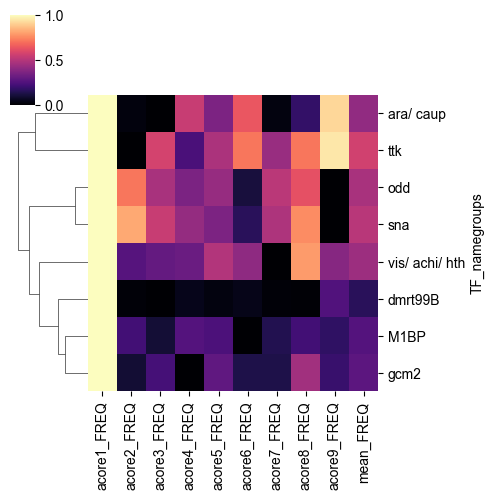

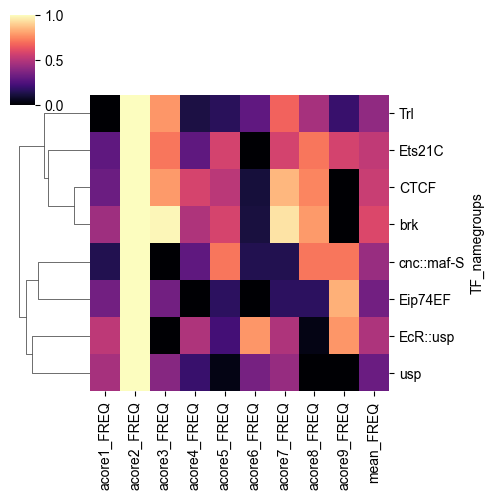

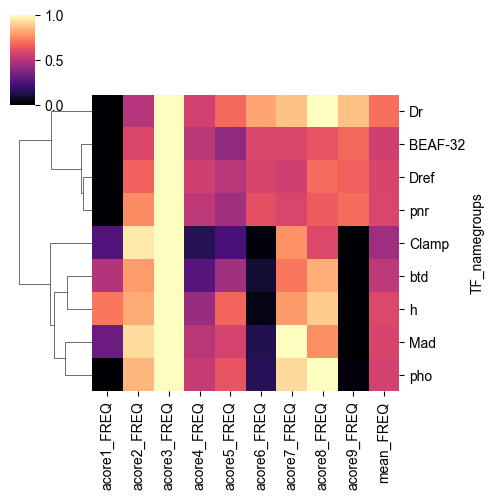

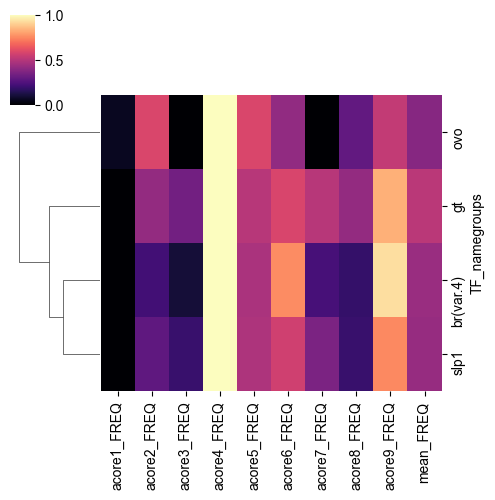

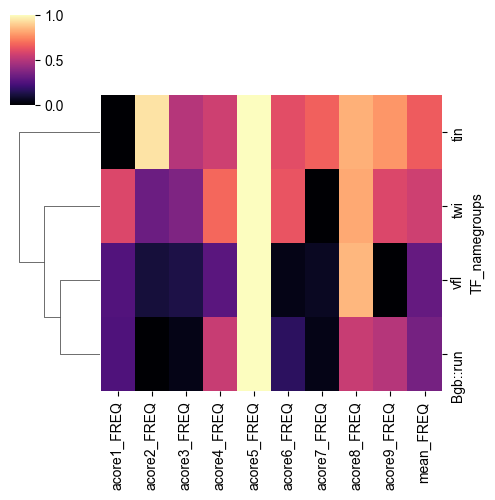

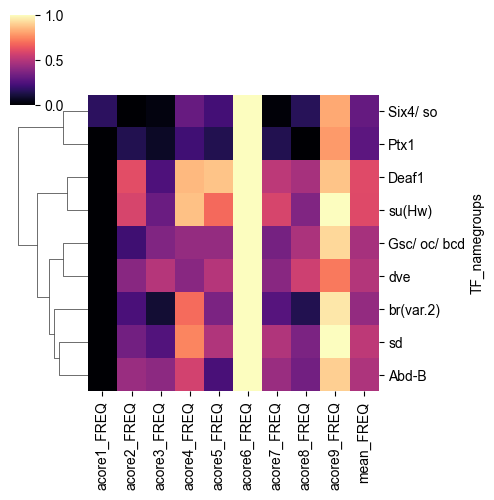

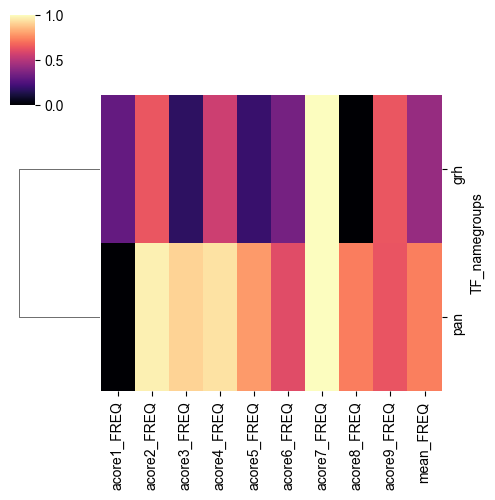

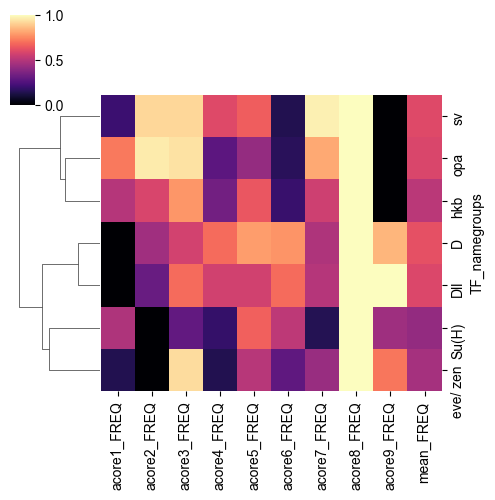

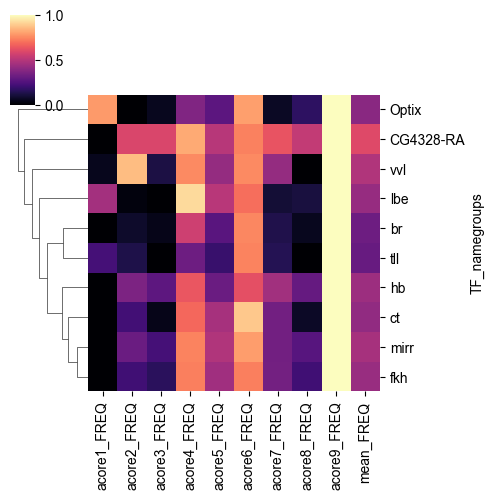

In [105]:
sig_table = merged_table_acores.loc[(merged_table_acores.filter(like='CORR.P-VALUE') < 0.05).any(axis = 1)]
sig_table = merged_table_acores.loc[(merged_table_acores.filter(like='CORR.P-VALUE') < 0.05).any(axis = 1)]
sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)

sig_table = sig_table.merge(species_keys, left_on = 'JASPAR_ID', right_on = 'full_list')

sig_enrichment_table = sig_table.sort_values(['mean_FREQ'], ascending = False)
sig_enrichment_table.index = sig_enrichment_table['TF_name']

dro_enrichment_table = sig_enrichment_table[sig_enrichment_table['Species_chars'] == 'Drosophila melanogaster']

groupby = dro_enrichment_table.groupby([col for col in sig_table.columns if '_FREQ' in col])
groupby_df = groupby['TF_name'].apply(list).reset_index()
groupby_df['TF_namegroups'] = groupby_df['TF_name'].apply(lambda x: '/ '.join(x))
groupby_df.index = groupby_df['TF_namegroups']

merged_acore_freq = groupby_df.filter(like='FREQ')
merged_acore_freq['max_acore'] = merged_acore_freq.idxmax(axis = 1).apply(lambda x: int(x.replace('acore', '').replace('_FREQ', '')))

acores = 9
topn_tfs = 10

for acore in np.arange(1, acores + 1):
    acore_top = merged_acore_freq[merged_acore_freq['max_acore'] == acore]
    acore_top = acore_top.sort_values('acore' + str(acore) + '_FREQ', ascending = False).filter(like = '_FREQ')
    acore_top = acore_top.iloc[0:topn_tfs]
    acore_clustermap = sns.clustermap(acore_top, row_cluster = True, col_cluster = False, figsize = (5, 5), standard_scale = 'rows', cmap = 'magma')
    acore_clustermap.savefig('HINT-ATAC_top' + str(top_n) +'_enrichment_acore' + str(acore) + '_grouped.svg')
    plt.show()

In [150]:
specific_base_directory = "enrichment_all_small/"

stage_array = ['13', '14', '15', '17', '18', '19', '19plus', '20', '21', '22', '23', '24', '25', '26', '27']

jaspar_core_mtf = pd.DataFrame(pd.read_csv('jaspar_core_nr.mtf', sep = '\t', header = None))

merged_table_all = pd.DataFrame()

i = 0
for stage in stage_array:
    basedir = specific_base_directory + 'S' + stage + '_hintatac_all/'
    txtloc = basedir + 'fulltest_statistics.txt'
    enrichment_table = pd.DataFrame(pd.read_csv(txtloc, sep = '\t'))
    enrichment_table['FREQ'] = enrichment_table['FREQ'].str.split('%', expand = True)[0]
    enrichment_table['FREQ'] = enrichment_table['FREQ'].astype('float')
    enrichment_table['BACK.FREQ.'] = enrichment_table['BACK.FREQ.'].str.split('%', expand = True)[0]
    enrichment_table['BACK.FREQ.'] = enrichment_table['BACK.FREQ.'].astype('float')
    enrichment_table = enrichment_table.merge(jaspar_core_mtf[[0, 3]], left_on = 'FACTOR', right_on = 0, how = 'left')
    if i == 0:
        merged_table_all = enrichment_table[[3, 'FACTOR', 'BACK.FREQ.', 'FREQ', 'CORR.P-VALUE']]
        merged_table_all = merged_table_all.add_prefix('S' + stage + '_')
        merged_table_all = merged_table_all.rename({'S13_3': 'TF_name', 'S13_FACTOR': 'JASPAR_ID', 'S13_BACK.FREQ.': 'BACK.FREQ.'}, axis = 1)
    else:
        frame_fragment = enrichment_table[['FREQ', 'CORR.P-VALUE']]
        frame_fragment = frame_fragment.add_prefix('S' + stage + '_')
        frame_fragment['JASPAR_ID'] = enrichment_table['FACTOR']
        merged_table_all = merged_table_all.merge(frame_fragment)
    i += 1
display(merged_table_all)

,TF_name,JASPAR_ID,BACK.FREQ.,S13_FREQ,S13_CORR.P-VALUE,S14_FREQ,S14_CORR.P-VALUE,S15_FREQ,S15_CORR.P-VALUE,S17_FREQ,...,S23_FREQ,S23_CORR.P-VALUE,S24_FREQ,S24_CORR.P-VALUE,S25_FREQ,S25_CORR.P-VALUE,S26_FREQ,S26_CORR.P-VALUE,S27_FREQ,S27_CORR.P-VALUE
0,MOT3,MA0340.1,3.54,4.67,0.0,4.78,0.0,4.80,0.0,4.70,...,4.55,0.0,4.53,0.0,4.53,0.0,4.49,0.0,4.55,0.0
1,MSN2,MA0341.1,1.28,2.36,0.0,2.39,0.0,2.38,0.0,2.38,...,2.44,0.0,2.47,0.0,2.45,0.0,2.45,0.0,2.44,0.0
2,MSN4,MA0342.1,1.28,2.36,0.0,2.39,0.0,2.38,0.0,2.38,...,2.44,0.0,2.47,0.0,2.45,0.0,2.45,0.0,2.44,0.0
3,RGM1,MA0366.1,1.28,2.36,0.0,2.39,0.0,2.38,0.0,2.38,...,2.44,0.0,2.47,0.0,2.45,0.0,2.45,0.0,2.44,0.0
4,MET28,MA0332.1,0.56,1.27,0.0,1.27,0.0,1.26,0.0,1.28,...,1.25,0.0,1.27,0.0,1.26,0.0,1.25,0.0,1.26,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,POU6F1,MA0628.1,0.24,0.11,1.0,0.13,1.0,0.13,1.0,0.12,...,0.11,1.0,0.11,1.0,0.11,1.0,0.11,1.0,0.12,1.0
1642,DBP,MA0639.1,0.13,0.11,1.0,0.13,1.0,0.11,1.0,0.11,...,0.11,1.0,0.11,1.0,0.10,1.0,0.10,1.0,0.11,1.0
1643,MYB77,MA1395.1,0.14,0.11,1.0,0.11,1.0,0.12,1.0,0.11,...,0.11,1.0,0.10,1.0,0.11,1.0,0.10,1.0,0.11,1.0
1644,PAX4,MA0068.2,0.14,0.10,1.0,0.12,1.0,0.11,1.0,0.11,...,0.10,1.0,0.10,1.0,0.10,1.0,0.10,1.0,0.10,1.0


<ipython-input-152-708f5a6180da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)


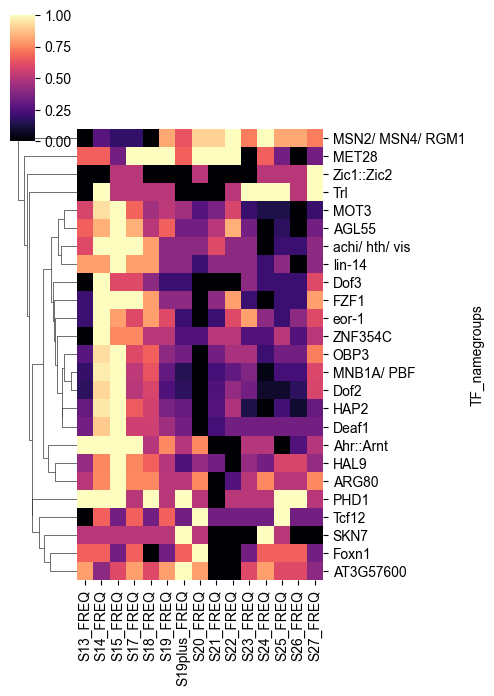

In [152]:
top_n = 25

sig_table = merged_table_all.loc[(merged_table_all.filter(like='CORR.P-VALUE') < 0.05).any(axis = 1)]
sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)

groupby = sig_table.groupby([col for col in sig_table.columns if '_FREQ' in col])
groupby_df = groupby['TF_name'].apply(list).reset_index()
groupby_df['TF_namegroups'] = groupby_df['TF_name'].apply(lambda x: '/ '.join(x))
groupby_df.index = groupby_df['TF_namegroups']
groupby_df = groupby_df.sort_values('mean_FREQ', ascending = False)
groupby_df = groupby_df.drop('mean_FREQ', axis = 1)

all_matrix = groupby_df.iloc[0:top_n].filter(like = '_FREQ')

clusters_top_enrich = sns.clustermap(all_matrix, col_cluster = False, figsize = (5, 7), standard_scale = 'rows', cmap = 'magma')
clusters_top_enrich.savefig('HINT-ATAC_top' + str(top_n) + '_enrichment_all_clustered_grouped.svg')

plt.show()

<ipython-input-154-8169fcfa3719>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)


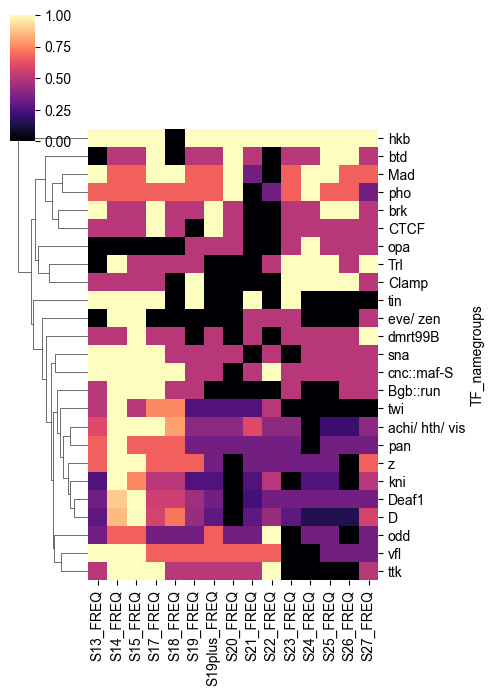

In [154]:
top_n = 25

species_keys = pd.DataFrame(pd.read_csv('jaspar_core_nr_UNIPROT_IDs_withspecies.csv', sep = "\t"))

sig_table = merged_table_all.loc[(merged_table_all.filter(like='CORR.P-VALUE') < 0.05).any(axis = 1)]
sig_table['mean_FREQ'] = sig_table.filter(like='_FREQ').astype('float').mean(axis = 1)

sig_table = sig_table.merge(species_keys, left_on = 'JASPAR_ID', right_on = 'full_list')

dro_enrichment_table = sig_table[sig_table['Species_chars'] == 'Drosophila melanogaster']

groupby = dro_enrichment_table.groupby([col for col in dro_enrichment_table.columns if '_FREQ' in col])
groupby_df = groupby['TF_name'].apply(list).reset_index()
groupby_df['TF_namegroups'] = groupby_df['TF_name'].apply(lambda x: '/ '.join(x))
groupby_df.index = groupby_df['TF_namegroups']
groupby_df = groupby_df.sort_values('mean_FREQ', ascending = False)
groupby_df = groupby_df.drop('mean_FREQ', axis = 1)

dro_matrix = groupby_df.iloc[0:top_n].filter(like = '_FREQ')

clusters_drotop = sns.clustermap(dro_matrix, col_cluster = False, figsize = (5, 7), standard_scale = 'rows', cmap = 'magma')
clusters_drotop.savefig('HINT-ATAC_top' + str(top_n) +'_enrichment_all_drosophila_grouped.svg')

plt.show()

In [248]:
nclusters = 9

for i in np.arange(1, nclusters + 1):
    clusterfolder = '20210821_STAMP_Cluster*/stamp_output_2389.tree'.replace('*', str(i))

    clusterdf = pd.DataFrame(pd.read_csv('JASPAR-Cluster*.csv'.replace('*', str(i))))
    display(clusterdf)
    
    IDtoName_dict = dict(zip(clusterdf['ID'].values, clusterdf['Name'].values))
    
    with open(clusterfolder, 'r') as file:
        string = file.readlines()[0]
        output = string
        
        for ID in IDtoName_dict:
            output = output.replace(ID, IDtoName_dict[ID].replace('(', '').replace(')', '').replace('.', '').replace('-', '').replace(':',''))
    
        output_file = open(clusterfolder.replace('.tree', '.renamed.tree'), 'w+')
        n = output_file.write(output)
        output_file.close()

,Unnamed: 0,ID,Name,Species,Class,Family,Logo
0,NaN,MA0011.1,br(var.2),Drosophila melanogaster,C2H2 zinc finger factors,Other factors with up to three adjacent zinc f...,NaN
1,NaN,MA0020.1,Dof2,Zea mays,C2H2 zinc finger factors,Dof-type,NaN
2,NaN,MA0053.1,MNB1A,Zea mays,C2H2 zinc finger factors,Dof-type,NaN
3,NaN,MA0064.1,PBF,Zea mays,C2H2 zinc finger factors,Dof-type,NaN
4,NaN,MA0130.1,ZNF354C,Homo sapiens,C2H2 zinc finger factors,More than 3 adjacent zinc finger factors,NaN
5,NaN,MA0142.1,Pou5f1::Sox2,Mus musculus,Homeo domain factors::High-mobility group (HMG...,POU domain factors::SOX-related factors,NaN
6,NaN,MA0165.1,Abd-B,Drosophila melanogaster,Homeo domain factors,HOX-related factors,NaN
7,NaN,MA0185.1,Deaf1,Drosophila melanogaster,SAND domain factors,DEAF,NaN
8,NaN,MA0190.1,Gsc,Drosophila melanogaster,Homeo domain factors,Paired-related HD factors,NaN
9,NaN,MA0201.1,Ptx1,Drosophila melanogaster,Homeo domain factors,Paired-related HD factors,NaN


,Unnamed: 0,ID,Name,Species,Class,Family,Logo
0,NaN,MA0010.1,br,Drosophila melanogaster,C2H2 zinc finger factors,Other factors with up to three adjacent zinc f...,NaN
1,NaN,MA0049.1,hb,Drosophila melanogaster,C2H2 zinc finger factors,Factors with multiple dispersed zinc fingers,NaN
2,NaN,MA0182.1,CG4328-RA,Drosophila melanogaster,Homeo domain factors,NaN,NaN
3,NaN,MA0197.1,nub,Drosophila melanogaster,Homeo domain factors,POU domain factors,NaN
4,NaN,MA0197.2,nub,Drosophila melanogaster,Homeo domain factors,POU domain factors,NaN
5,NaN,MA0199.1,Optix,Drosophila melanogaster,Homeo domain factors,HD-SINE factors,NaN
6,NaN,MA0210.1,ara,Drosophila melanogaster,Homeo domain factors,TALE-type homeo domain factors,NaN
7,NaN,MA0217.1,caup,Drosophila melanogaster,Homeo domain factors,TALE-type homeo domain factors,NaN
8,NaN,MA0218.1,ct,Drosophila melanogaster,Homeo domain factors,HD-CUT factors,NaN
9,NaN,MA0231.1,lbe,Drosophila melanogaster,Homeo domain factors,NaN,NaN


,Unnamed: 0,ID,Name,Species,Class,Family,Logo
0,NaN,MA0002.2,RUNX1,Mus musculus,Runt domain factors,Runt-related factors,NaN
1,NaN,MA0004.1,Arnt,Mus musculus,Basic helix-loop-helix factors (bHLH),PAS domain factors,NaN
2,NaN,MA0096.1,bZIP910,Antirrhinum majus,Basic leucine zipper factors (bZIP),NaN,NaN
3,NaN,MA0242.1,Bgb::run,Drosophila melanogaster,Runt domain factors::Runt domain factors,Runt-related factors::Runt-related factors,NaN
4,NaN,MA0247.2,tin,Drosophila melanogaster,Homeo domain factors,NaN,NaN
5,NaN,MA0249.1,twi,Drosophila melanogaster,Basic helix-loop-helix factors (bHLH),NaN,NaN
6,NaN,MA0264.1,ceh-22,Caenorhabditis elegans,Homeo domain factors,NK-related factors,NaN
7,NaN,MA0281.1,CBF1,Saccharomyces cerevisiae,Basic helix-loop-helix factors (bHLH),NaN,NaN
8,NaN,MA0673.1,NKX2-8,Homo sapiens,Homeo domain factors,NK-related factors,NaN
9,NaN,MA0868.2,SOX8,Homo sapiens,High-mobility group (HMG) domain factors,SOX-related factors,NaN


,Unnamed: 0,ID,Name,Species,Class,Family,Logo
0,NaN,MA0048.2,NHLH1,Homo sapiens,Basic helix-loop-helix factors (bHLH),Tal-related factors,NaN
1,NaN,MA0085.1,Su(H),Drosophila melanogaster,NaN,NaN,NaN
2,NaN,MA0149.1,EWSR1-FLI1,Homo sapiens,Tryptophan cluster factors,Ets-related factors,NaN
3,NaN,MA0187.1,Dll,Drosophila melanogaster,Homeo domain factors,NaN,NaN
4,NaN,MA0188.1,Dr,Drosophila melanogaster,Homeo domain factors,NK-related factors,NaN
5,NaN,MA0207.1,achi,Drosophila melanogaster,Homeo domain factors,NaN,NaN
6,NaN,MA0221.1,eve,Drosophila melanogaster,Homeo domain factors,HOX-related factors,NaN
7,NaN,MA0227.1,hth,Drosophila melanogaster,Homeo domain factors,TALE-type homeo domain factors,NaN
8,NaN,MA0252.1,vis,Drosophila melanogaster,Homeo domain factors,NaN,NaN
9,NaN,MA0256.1,zen,Drosophila melanogaster,Homeo domain factors,NaN,NaN


,Unnamed: 0,ID,Name,Species,Class,Family,Logo
0,NaN,MA0188.1,Dr,Drosophila melanogaster,Homeo domain factors,NK-related factors,NaN
1,NaN,MA0443.1,btd,Drosophila melanogaster,C2H2 zinc finger factors,Other factors with up to three adjacent zinc f...,NaN
2,NaN,MA0449.1,h,Drosophila melanogaster,Zipper-type,Helix-Loop-Helix,NaN
3,NaN,MA0529.2,BEAF-32,Drosophila melanogaster,C2H2 zinc finger factors,NaN,NaN
4,NaN,MA0535.1,Mad,Drosophila melanogaster,SMAD/NF-1 DNA-binding domain factors,SMAD factors,NaN
5,NaN,MA0536.1,pnr,Drosophila melanogaster,Other C4 zinc finger-type factors,GATA-type zinc fingers,NaN
6,NaN,MA0976.2,CRF4,Arabidopsis thaliana,AP2/ERF domain,NaN,NaN
7,NaN,MA1225.1,ERF5,Arabidopsis thaliana,AP2/ERF domain,NaN,NaN
8,NaN,MA1226.1,AT5G18450,Arabidopsis thaliana,AP2/ERF domain,NaN,NaN
9,NaN,MA1228.1,AT4G18450,Arabidopsis thaliana,AP2/ERF domain,NaN,NaN


,Unnamed: 0,ID,Name,Species,Class,Family,Logo
0,NaN,MA0021.1,Dof3,Zea mays,C2H2 zinc finger factors,Dof-type,NaN
1,NaN,MA0141.3,ESRRB,Homo sapiens,Nuclear receptors with C4 zinc fingers,Steroid hormone receptors (NR3),NaN
2,NaN,MA0160.1,NR4A2,Mus musculus ...,Nuclear receptors with C4 zinc fingers,NGFI-B-related receptors (NR4),NaN
3,NaN,MA0237.2,pan,Drosophila melanogaster,High-mobility group (HMG) domain factors,NaN,NaN
4,NaN,MA0504.1,NR2C2,Homo sapiens,Nuclear receptors with C4 zinc fingers,RXR-related receptors (NR2),NaN
5,NaN,MA0505.1,Nr5a2,Mus musculus,Nuclear receptors with C4 zinc fingers,FTZ-F1-related receptors (NR5),NaN
6,NaN,MA0508.3,PRDM1,Homo sapiens,C2H2 zinc finger factors,More than 3 adjacent zinc finger factors,NaN
7,NaN,MA0535.1,Mad,Drosophila melanogaster,SMAD/NF-1 DNA-binding domain factors,SMAD factors,NaN
8,NaN,MA0592.3,ESRRA,Homo sapiens,Nuclear receptors with C4 zinc fingers,Steroid hormone receptors (NR3),NaN
9,NaN,MA0643.1,Esrrg,Mus musculus,Nuclear receptors with C4 zinc fingers,Steroid hormone receptors (NR3),NaN


,Unnamed: 0,ID,Name,Species,Class,Family,Logo
0,NaN,MA0016.1,usp,Drosophila melanogaster,Nuclear receptors with C4 zinc fingers,NaN,NaN
1,NaN,MA0026.1,Eip74EF,Drosophila melanogaster,Tryptophan cluster factors,Ets-related factors,NaN
2,NaN,MA0205.2,Trl,Drosophila melanogaster,C2H2 zinc finger factors,NaN,NaN
3,NaN,MA0213.1,brk,Drosophila melanogaster,NaN,NaN,NaN
4,NaN,MA0355.1,PHD1,Saccharomyces cerevisiae,APSES-type DNA-binding domain,NaN,NaN
5,NaN,MA0365.1,RFX1,Saccharomyces cerevisiae,Fork head / winged helix factors,RFX-related factors,NaN
6,NaN,MA0500.2,MYOG,Homo sapiens,Basic helix-loop-helix factors (bHLH),MyoD / ASC-related factors,NaN
7,NaN,MA0521.1,Tcf12,Mus musculus,Basic helix-loop-helix factors (bHLH),E2A-related factors,NaN
8,NaN,MA0530.1,cnc::maf-S,Drosophila melanogaster,Basic leucine zipper factors (bZIP)::Basic leu...,Jun-related factors::Maf-related factors,NaN
9,NaN,MA0531.1,CTCF,Drosophila melanogaster,C2H2 zinc finger factors,More than 3 adjacent zinc finger factors,NaN


,Unnamed: 0,ID,Name,Species,Class,Family,Logo
0,NaN,MA0078.1,Sox17,Mus musculus,High-mobility group (HMG) domain factors,SOX-related factors,NaN
1,NaN,MA0086.2,sna,Drosophila melanogaster,C2H2 zinc finger factors,More than 3 adjacent zinc finger factors,NaN
2,NaN,MA0119.1,NFIC::TLX1,Homo sapiens,SMAD/NF-1 DNA-binding domain factors::Homeo do...,Nuclear factor 1::NK-related factors,NaN
3,NaN,MA0207.1,achi,Drosophila melanogaster,Homeo domain factors,NaN,NaN
4,NaN,MA0210.1,ara,Drosophila melanogaster,Homeo domain factors,TALE-type homeo domain factors,NaN
5,NaN,MA0217.1,caup,Drosophila melanogaster,Homeo domain factors,TALE-type homeo domain factors,NaN
6,NaN,MA0227.1,hth,Drosophila melanogaster,Homeo domain factors,TALE-type homeo domain factors,NaN
7,NaN,MA0252.1,vis,Drosophila melanogaster,Homeo domain factors,NaN,NaN
8,NaN,MA0262.1,mab-3,Caenorhabditis elegans,DM-type intertwined zinc finger factors,NaN,NaN
9,NaN,MA0332.1,MET28,Saccharomyces cerevisiae,Basic leucine zipper factors (bZIP),NaN,NaN


,Unnamed: 0,ID,Name,Species,Class,Family,Logo
0,NaN,MA0013.1,br(var.4),Drosophila melanogaster,C2H2 zinc finger factors,Other factors with up to three adjacent zinc f...,NaN
1,NaN,MA0047.3,FOXA2,Homo sapiens,Fork head / winged helix factors,Forkhead box (FOX) factors,NaN
2,NaN,MA0126.1,ovo,Drosophila melanogaster,C2H2 zinc finger factors,More than 3 adjacent zinc finger factors,NaN
3,NaN,MA0297.1,FKH2,Saccharomyces cerevisiae,Fork head / winged helix factors,Forkhead box (FOX) factors,NaN
4,NaN,MA0447.1,gt,Drosophila melanogaster,Basic leucine zipper factors (bZIP),NaN,NaN
5,NaN,MA0458.1,slp1,Drosophila melanogaster,Fork head / winged helix factors,Forkhead box (FOX) factors,NaN
6,NaN,MA0481.3,FOXP1,Homo sapiens,Fork head / winged helix factors,Forkhead box (FOX) factors,NaN
7,NaN,MA0593.1,FOXP2,Homo sapiens,Fork head / winged helix factors,Forkhead box (FOX) factors,NaN
8,NaN,MA0613.1,FOXG1,Homo sapiens,Fork head / winged helix factors,Forkhead box (FOX) factors,NaN
9,NaN,MA0846.1,FOXC2,Homo sapiens,Fork head / winged helix factors,Forkhead box (FOX) factors,NaN
